In [2]:
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.use("Agg")
from scipy.stats import gaussian_kde
import sys
#import MDAnalysis as mda
#from MDAnalysis.tests.datafiles import PSF, DCD
#from MDAnalysis.analysis import pca, align
import pytraj as pt
import seaborn as sns
#import nglview as nv
#import warnings
# suppress some MDAnalysis warnings about writing PDB files
#warnings.filterwarnings('ignore')
#from prody import *
from pylab import *
ion()

ImportError: libcpptraj.so: cannot open shared object file: No such file or directory

## Reading trajectories and RMSD files

In [2]:
#Reading RMSD files run1
dimer_3b3f_rmsd = pd.read_csv('../../3b3f/dimer/analysis_800/rmsd_byres_3b3f_dimer_800.dat', sep='\t', header=None)
monomer_3b3f_rmsd = pd.read_csv('../../3b3f/monomer/analysis_800/rmsd_byres_3b3f_monomer_800.dat', sep='\t', header=None)
dimer_3b3j_rmsd = pd.read_csv('../../3b3j/dimer/analysis_800/rmsd_byres_3b3j_dimer_800.dat', sep='\t', header=None )
monomer_3b3j_rmsd = pd.read_csv('../../3b3j/monomer/analysis_800/rmsd_byres_3b3j_monomer_800.dat', sep='\t', header=None)
#Assigning df columns
dimer_3b3f_rmsd[['Frame', 'perres']] = dimer_3b3f_rmsd[0].str.split(expand=True)
monomer_3b3f_rmsd[['Frame', 'perres']] = monomer_3b3f_rmsd[0].str.split(expand=True)
dimer_3b3j_rmsd[['Frame', 'perres']] = dimer_3b3j_rmsd[0].str.split(expand=True)
monomer_3b3j_rmsd[['Frame', 'perres']] = monomer_3b3j_rmsd[0].str.split(expand=True)

# Convert the 'Frame' and 'perres' columns to numeric
def convert_to_numeric(df):
    df['Frame'] = pd.to_numeric(df['Frame'], errors='coerce')
    df['perres'] = pd.to_numeric(df['perres'], errors='coerce')
    return df
dimer_3b3f_rmsd = convert_to_numeric(dimer_3b3f_rmsd)
monomer_3b3f_rmsd = convert_to_numeric(monomer_3b3f_rmsd)
dimer_3b3j_rmsd = convert_to_numeric(dimer_3b3j_rmsd)
monomer_3b3j_rmsd = convert_to_numeric(monomer_3b3j_rmsd)
# removing the first null rows
dimer_3b3f_rmsd = dimer_3b3f_rmsd.drop(index=0)
monomer_3b3f_rmsd = monomer_3b3f_rmsd.drop(index=0)
dimer_3b3j_rmsd =dimer_3b3j_rmsd.drop(index=0)
monomer_3b3j_rmsd = monomer_3b3j_rmsd.drop(index=0)
dimer_3b3f_rmsd.head(), monomer_3b3f_rmsd.head(), dimer_3b3j_rmsd.head(), monomer_3b3j_rmsd.head()
##################################################################################################################################


(                       0  Frame  perres
 1         1       0.0000    1.0  0.0000
 2         2       1.2751    2.0  1.2751
 3         3       1.2026    3.0  1.2026
 4         4       1.3527    4.0  1.3527
 5         5       1.3434    5.0  1.3434,
                        0  Frame  perres
 1         1       0.0000    1.0  0.0000
 2         2       1.3284    2.0  1.3284
 3         3       1.2337    3.0  1.2337
 4         4       1.4719    4.0  1.4719
 5         5       1.5833    5.0  1.5833,
                        0  Frame  perres
 1         1       0.0000    1.0  0.0000
 2         2       1.2672    2.0  1.2672
 3         3       1.4554    3.0  1.4554
 4         4       1.5736    4.0  1.5736
 5         5       1.5695    5.0  1.5695,
                        0  Frame  perres
 1         1       0.0000    1.0  0.0000
 2         2       1.3759    2.0  1.3759
 3         3       1.6346    3.0  1.6346
 4         4       1.6799    4.0  1.6799
 5         5       1.8179    5.0  1.8179)

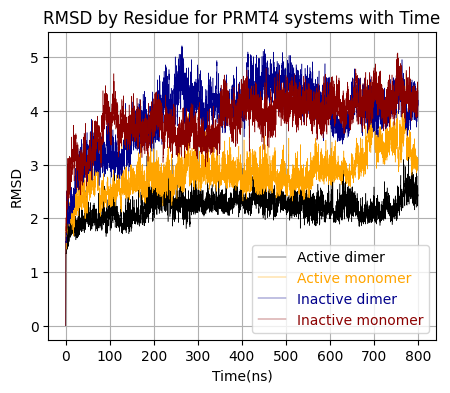

In [3]:
# Generate time axis for RMSD plot. The trajectory was saved every 0.002 ns, and we have 200000 steps.
# time = nsteps * dt
total_time = 400000000 * 0.002 /1000
time = np.linspace(0, total_time, len(dimer_3b3f_rmsd))

# Plot the data with time
%matplotlib inline
plt.figure(figsize=(5, 4))
plt.plot(time, dimer_3b3f_rmsd['perres'], label='Active dimer', color = 'black',linewidth=0.35)
plt.plot(time, monomer_3b3f_rmsd['perres'], label='Active monomer', color = 'orange',linewidth=0.35)
plt.plot(time, dimer_3b3j_rmsd['perres'], label='Inactive dimer', color = 'darkblue',linewidth=0.35)
plt.plot(time, monomer_3b3j_rmsd['perres'], label='Inactive monomer', color = 'darkred',linewidth=0.35)
plt.xlabel('Time(ns)')
plt.ylabel('RMSD')
plt.title('RMSD by Residue for PRMT4 systems with Time')
plt.grid(True)
plt.legend(labelcolor='linecolor')
plt.show()
#################################################################################

In [4]:
#dimer_3b3f_rmsd_avg = pd.read_csv('../3b3f/dimer/analysis/3b3fdimerperresavg.dat', sep='\t', header=None)
#monomer_3b3f_rmsd_avg = pd.read_csv('../3b3f/monomer/analysis/3b3fmonomerperresavg.dat', sep='\t', header=None)
#dimer_3b3j_rmsd_avg = pd.read_csv('../3b3j/dimer/analysis/3b3jdimerperresavg.dat', sep='\t', header=None )
#monomer_3b3j_rmsd_avg = pd.read_csv('../3b3j/monomer/analysis/3b3jmonomerperresavg.dat', sep='\t', header=None)
#
#dimer_3b3f_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = dimer_3b3f_rmsd_avg[0].str.split(expand=True)
#monomer_3b3f_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = monomer_3b3f_rmsd_avg[0].str.split(expand=True)
#dimer_3b3j_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = dimer_3b3j_rmsd_avg[0].str.split(expand=True)
#monomer_3b3j_rmsd_avg[['Residue', 'reference[Avg]', 'reference[Stdev]']] = monomer_3b3j_rmsd_avg[0].str.split(expand=True)
#
## Convert the 'Frame' and 'perres' columns to numeric
#def convert_to_numeric(df):
#    df['Residue'] = pd.to_numeric(df['Residue'], errors='coerce')
#    df['reference[Avg]'] = pd.to_numeric(df['reference[Avg]'], errors='coerce')
#    df['reference[Stdev]'] = pd.to_numeric(df['reference[Stdev]'], errors='coerce')
#    return df
#
#dimer_3b3f_rmsd_avg = convert_to_numeric(dimer_3b3f_rmsd_avg)
#monomer_3b3f_rmsd_avg = convert_to_numeric(monomer_3b3f_rmsd_avg)
#dimer_3b3j_rmsd_avg = convert_to_numeric(dimer_3b3j_rmsd_avg)
#monomer_3b3j_rmsd_avg = convert_to_numeric(monomer_3b3j_rmsd_avg)
#
## removing the first null rows
#dimer_3b3f_rmsd_avg = dimer_3b3f_rmsd_avg.drop(index=0)
#monomer_3b3f_rmsd_avg = monomer_3b3f_rmsd_avg.drop(index=0)
#dimer_3b3j_rmsd_avg =dimer_3b3j_rmsd_avg.drop(index=0)
#monomer_3b3j_rmsd_avg = monomer_3b3j_rmsd_avg.drop(index=0)
#
#monomer_3b3f_rmsd_avg.head()

In [10]:
##########################################################################################################################################
# Renumbering the residues active dimer
# Define the length of the new numbering sequence
#start_residue = 134
#new_length = 345
## Reassign the 'Res' column to a new range of values
#dimer_3b3f_rmsd_avg['Residue'] = np.tile(range(start_residue, start_residue + new_length), len(dimer_3b3f_rmsd_avg) // new_length + 1)[:len(dimer_3b3f_rmsd_avg)]
## Renumbering the residues active monomer
#start_residue = 134
#new_length = 345
## Reassign the 'Res' column to a new range of values from 1 to 345
#monomer_3b3f_rmsd_avg['Residue'] = np.tile(range(start_residue, start_residue + new_length), len(monomer_3b3f_rmsd_avg) // new_length + 1)[:len(monomer_3b3f_rmsd_avg)]

## Renumbering the residues inactive dimer
## Define the length of the new numbering sequence
#start_residue_inactive = 155
#new_length_inactive = 324
## Reassign the 'Res' column to a new range of values from 1 to 345
#dimer_3b3j_rmsd_avg['Residue'] = np.tile(range(start_residue_inactive, start_residue_inactive + new_length_inactive), len(dimer_3b3j_rmsd_avg) // new_length_inactive + 1)[:len(dimer_3b3j_rmsd_avg)]
#
## Renumbering the residues inactive monomer
## Define the length of the new numbering sequence
#start_residue_inactive = 155
#new_length_inactive = 324
## Reassign the 'Res' column to a new range of values from 1 to 345
#monomer_3b3j_rmsd_avg['Residue'] = np.tile(range(start_residue_inactive, start_residue_inactive + new_length_inactive), len(monomer_3b3j_rmsd_avg) // new_length_inactive + 1)[:len(monomer_3b3j_rmsd_avg)]
#dimer_3b3f_rmsd_avg.head()
########################################################################################################################################################

In [11]:
## active RMSD plotting
#start_indexA = 1
#end_indexA = 345
#res_rangeA1 = dimer_3b3f_rmsd_avg.loc[start_indexA:end_indexA, 'Residue']
#RMSD_avg_rangeA1 = dimer_3b3f_rmsd_avg.loc[start_indexA:end_indexA, 'reference[Avg]']
#
#start_indexB = 346
#end_indexB = 690
#res_rangeB1 = dimer_3b3f_rmsd_avg.loc[start_indexB:end_indexB, 'Residue']
#RMSD_avg_rangeB1 = dimer_3b3f_rmsd_avg.loc[start_indexB:end_indexB, 'reference[Avg]']
#
#%matplotlib inline
#plt.figure(figsize=(10, 5))
#
#plt.plot(res_rangeA1,RMSD_avg_rangeA1, color='black', label='activeD chainA')
#plt.plot(res_rangeB1,RMSD_avg_rangeB1, color='blue', label='activeD chainB')
#
#plt.plot(monomer_3b3f_rmsd_avg['Residue'], monomer_3b3f_rmsd_avg['reference[Avg]'], color='red', label='activeM')
#plt.axvspan(300,338, facecolor = 'mediumpurple', label ='Dimerization arm')
#plt.axvspan(149,155, facecolor = 'silver', label ='Cofactor')
#plt.axvspan(138,138, facecolor = 'silver')
#plt.axvspan(160,160, facecolor = 'silver')
#plt.axvspan(164,164, facecolor = 'silver')
#plt.axvspan(169,169, facecolor = 'silver')
#plt.axvspan(191,191, facecolor = 'silver')
#plt.axvspan(193,193, facecolor = 'silver')
#plt.axvspan(196,196, facecolor = 'silver')
#plt.axvspan(214,216, facecolor = 'silver')
#plt.axvspan(242,245, facecolor = 'silver')
#plt.axvspan(272,272, facecolor = 'silver')
#plt.axvspan(159,159, facecolor = 'lightcoral', label ='Substrate site')
#plt.axvspan(146,146, facecolor = 'lightcoral')
#plt.axvspan(161,163, facecolor = 'lightcoral')
#plt.axvspan(166,168, facecolor = 'lightcoral')
#plt.axvspan(257,260, facecolor = 'lightcoral')
#plt.axvspan(262,262, facecolor = 'lightcoral')
#plt.axvspan(266,269, facecolor = 'lightcoral')
#plt.axvspan(287,287, facecolor = 'lightcoral')
#plt.axvspan(415,417, facecolor = 'lightcoral')
#plt.axvspan(446,447, facecolor = 'lightcoral')
#plt.axvspan(473,477, facecolor = 'lightcoral')
#
#plt.xlabel('Residue Number')
#plt.ylabel('Avg RMSD')
#plt.title('Avg RMSD per residue for active systems dimer and monomer')
#plt.legend()
##plt.grid(True)
#plt.xticks(np.arange(130, 500, 10.0))
#plt.xticks(rotation=90)
#plt.show()
#########################################################################################################################

# RMSF

In [2]:
# Reading the RMSF files run 1
dimer_3b3f_rmsf = pd.read_csv('../../3b3f/dimer/analysis_800/rmsf_3b3f_dimer_800.dat', sep=r'\s+', header=None)
monomer_3b3f_rmsf = pd.read_csv('../../3b3f/monomer/analysis_800/rmsf_3b3f_monomer_800.dat', sep=r'\s+', header=None)
dimer_3b3j_rmsf = pd.read_csv('../../3b3j/dimer/analysis_800/rmsf_3b3j_dimer_800.dat', sep=r'\s+', header=None)
monomer_3b3j_rmsf = pd.read_csv('../../3b3j/monomer/analysis_800/rmsf_3b3j_monomer_800.dat', sep=r'\s+', header=None)
#Assigning names to columns
dimer_3b3f_rmsf.columns = ['Res', 'AtomicFlx']
monomer_3b3f_rmsf.columns = ['Res', 'AtomicFlx']
dimer_3b3j_rmsf.columns = ['Res', 'AtomicFlx']
monomer_3b3j_rmsf.columns = ['Res', 'AtomicFlx']
# removing the first null rows
dimer_3b3f_rmsf= dimer_3b3f_rmsf.drop(index=0)
monomer_3b3f_rmsf = monomer_3b3f_rmsf.drop(index=0)
dimer_3b3j_rmsf =dimer_3b3j_rmsf.drop(index=0)
monomer_3b3j_rmsf = monomer_3b3j_rmsf.drop(index=0)
##########################################################################################################################################

In [3]:
# Renumbering the residues active dimer
# Define the length of the new numbering sequence
start_residue = 153
new_length = 326
# Reassign the 'Res' column to a new range of values
dimer_3b3f_rmsf['Res'] = np.tile(range(start_residue, start_residue + new_length), len(dimer_3b3f_rmsf) // new_length + 1)[:len(dimer_3b3f_rmsf)]
# Renumbering the residues active monomer
start_residue = 153
new_length = 326
# Reassign the 'Res' column to a new range of values from 1 to 345
monomer_3b3f_rmsf['Res'] = np.tile(range(start_residue, start_residue + new_length), len(monomer_3b3f_rmsf) // new_length + 1)[:len(monomer_3b3f_rmsf)]

# Renumbering the residues inactive dimer
# Define the length of the new numbering sequence
start_residue_inactive = 153
new_length_inactive = 326
# Reassign the 'Res' column to a new range of values from 1 to 345
dimer_3b3j_rmsf['Res'] = np.tile(range(start_residue_inactive, start_residue_inactive + new_length_inactive), len(dimer_3b3j_rmsf) // new_length_inactive + 1)[:len(dimer_3b3j_rmsf)]

# Renumbering the residues inactive monomer
# Define the length of the new numbering sequence
start_residue_inactive = 153
new_length_inactive = 326
# Reassign the 'Res' column to a new range of values from 1 to 345
monomer_3b3j_rmsf['Res'] = np.tile(range(start_residue_inactive, start_residue_inactive + new_length_inactive), len(monomer_3b3j_rmsf) // new_length_inactive + 1)[:len(monomer_3b3j_rmsf)]
#######################################################################################################################################################
# active Dimer
# Adding chain dataframe
# Calculate the number of rows in the dataframe
num_rows = len(dimer_3b3f_rmsf)
# Create a list of values with half "value1" and half "value2"
half_length = num_rows // 2
values = ["chain_A"] * half_length + ["chain_B"] * (num_rows - half_length)
# Add the new column to the dataframe
dimer_3b3f_rmsf ['Chain'] = values

## active Monomer
# Adding chain dataframe
valuesM = ["chain_A"] * len(monomer_3b3f_rmsf)
# Add the new column to the dataframe
monomer_3b3f_rmsf ['Chain'] = valuesM

# inactive Dimer
# Adding chain dataframe
# Calculate the number of rows in the dataframe
num_rows_inactive = len(dimer_3b3j_rmsf)
# Create a list of values with half "value1" and half "value2"
half_length_inactive = num_rows_inactive // 2
values_inactive = ["chain_A"] * half_length_inactive + ["chain_B"] * (num_rows_inactive - half_length_inactive)
# Add the new column to the dataframe
dimer_3b3j_rmsf ['Chain'] = values_inactive

# inactive Monomer
# Adding chain dataframe
values_inactiveM = ["chain_A"] * len(monomer_3b3j_rmsf)
# Add the new column to the dataframe
monomer_3b3j_rmsf ['Chain'] = values_inactiveM

# Convert the "AtomicFlx" column to numeric
dimer_3b3f_rmsf["AtomicFlx"] = pd.to_numeric(dimer_3b3f_rmsf["AtomicFlx"], errors='coerce')
monomer_3b3f_rmsf["AtomicFlx"] = pd.to_numeric(monomer_3b3f_rmsf["AtomicFlx"], errors='coerce')
dimer_3b3j_rmsf["AtomicFlx"] = pd.to_numeric(dimer_3b3j_rmsf["AtomicFlx"], errors='coerce')
monomer_3b3j_rmsf["AtomicFlx"] = pd.to_numeric(monomer_3b3j_rmsf["AtomicFlx"], errors='coerce')
dimer_3b3f_rmsf.head(),dimer_3b3f_rmsf.tail(),monomer_3b3f_rmsf.head(),monomer_3b3f_rmsf.tail(),dimer_3b3j_rmsf.head(),dimer_3b3j_rmsf.tail(),monomer_3b3j_rmsf.head(),monomer_3b3j_rmsf.tail()
#######################################################################################################################################################

(   Res  AtomicFlx    Chain
 1  153     5.8254  chain_A
 2  154     5.8492  chain_A
 3  155     2.0180  chain_A
 4  156     1.9885  chain_A
 5  157     1.2318  chain_A,
      Res  AtomicFlx    Chain
 648  474     1.3676  chain_B
 649  475     1.9017  chain_B
 650  476     1.6311  chain_B
 651  477     3.6225  chain_B
 652  478     4.8574  chain_B,
    Res  AtomicFlx    Chain
 1  153     7.0145  chain_A
 2  154     7.1575  chain_A
 3  155     5.4260  chain_A
 4  156     5.7845  chain_A
 5  157     5.3838  chain_A,
      Res  AtomicFlx    Chain
 322  474     1.2300  chain_A
 323  475     1.8759  chain_A
 324  476     1.2981  chain_A
 325  477     2.8256  chain_A
 326  478     3.4121  chain_A,
    Res  AtomicFlx    Chain
 1  153     1.6334  chain_A
 2  154     1.9141  chain_A
 3  155     1.9060  chain_A
 4  156     3.1676  chain_A
 5  157     2.1170  chain_A,
      Res  AtomicFlx    Chain
 648  474     1.7426  chain_B
 649  475     1.9864  chain_B
 650  476     1.6274  chain_B
 651  477  

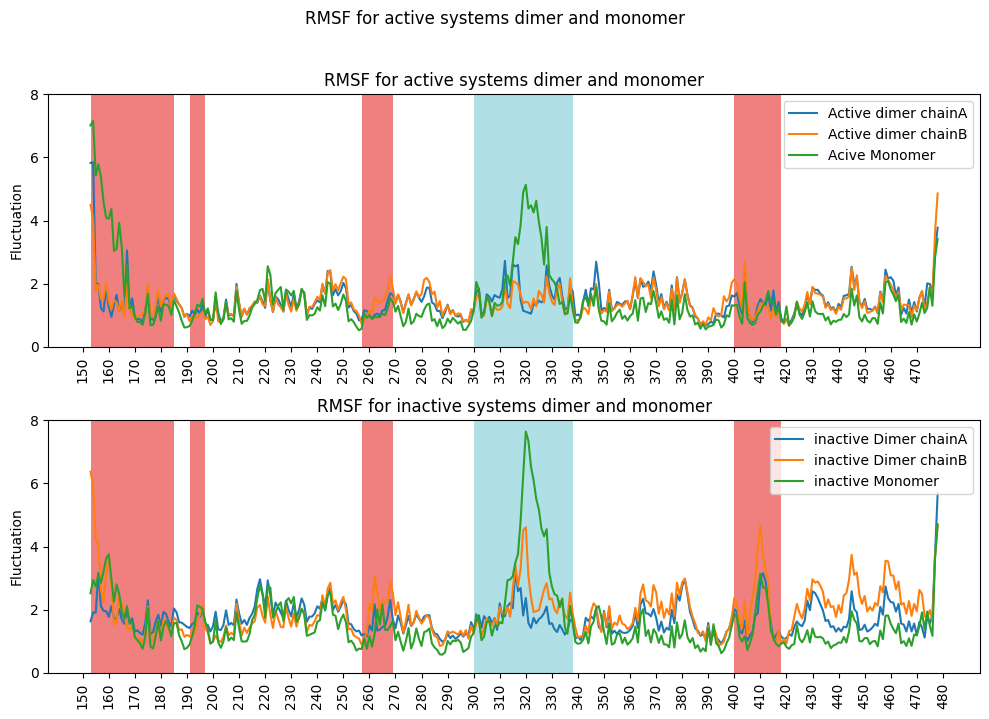

In [7]:
%matplotlib inline
# Define the start and end indices for the different chains
start_indexA = 1
end_indexA = 326
start_indexB = 327
end_indexB = 652

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 7))

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Plot for subplot 1
axs[0].plot(dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'Res'], dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'AtomicFlx'], label='Active dimer chainA')
axs[0].plot(dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'Res'], dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'AtomicFlx'], label='Active dimer chainB')
axs[0].plot(monomer_3b3f_rmsf['Res'], monomer_3b3f_rmsf['AtomicFlx'], label='Acive Monomer')
axs[0].set_title('RMSF for active systems dimer and monomer')
axs[0].set_ylabel('Fluctuation')
axs[0].legend()
#axs[0].grid(True)
axs[0].set_xticks(np.arange(150, 480, 10.0))
axs[0].set_yticks(np.arange(0, 10, 2))
axs[0].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[0].axvspan(start, end, facecolor=color, label=label)

# Define the start and end indices for the different chains
start_index_inactiveA = 1
end_index_inactiveA = 326
start_index_inactiveB = 327
end_index_inactiveB = 652

# Plot for subplot 1
axs[1].plot(dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'Res'], dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'AtomicFlx'], label='inactive Dimer chainA')
axs[1].plot(dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'Res'], dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'AtomicFlx'], label='inactive Dimer chainB')
axs[1].plot(monomer_3b3j_rmsf['Res'], monomer_3b3j_rmsf['AtomicFlx'], label='inactive Monomer')
axs[1].set_title('RMSF for inactive systems dimer and monomer')
axs[1].set_ylabel('Fluctuation')
axs[1].legend()
#axs[1].grid(True)
axs[1].set_xticks(np.arange(150, 490, 10.0))
axs[1].set_yticks(np.arange(0, 10, 2))
axs[1].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[1].axvspan(start, end, facecolor=color, label=label)
    
# Title for the whole plot
plt.suptitle('RMSF for active systems dimer and monomer', y=1.02)

plt.tight_layout()
plt.show()

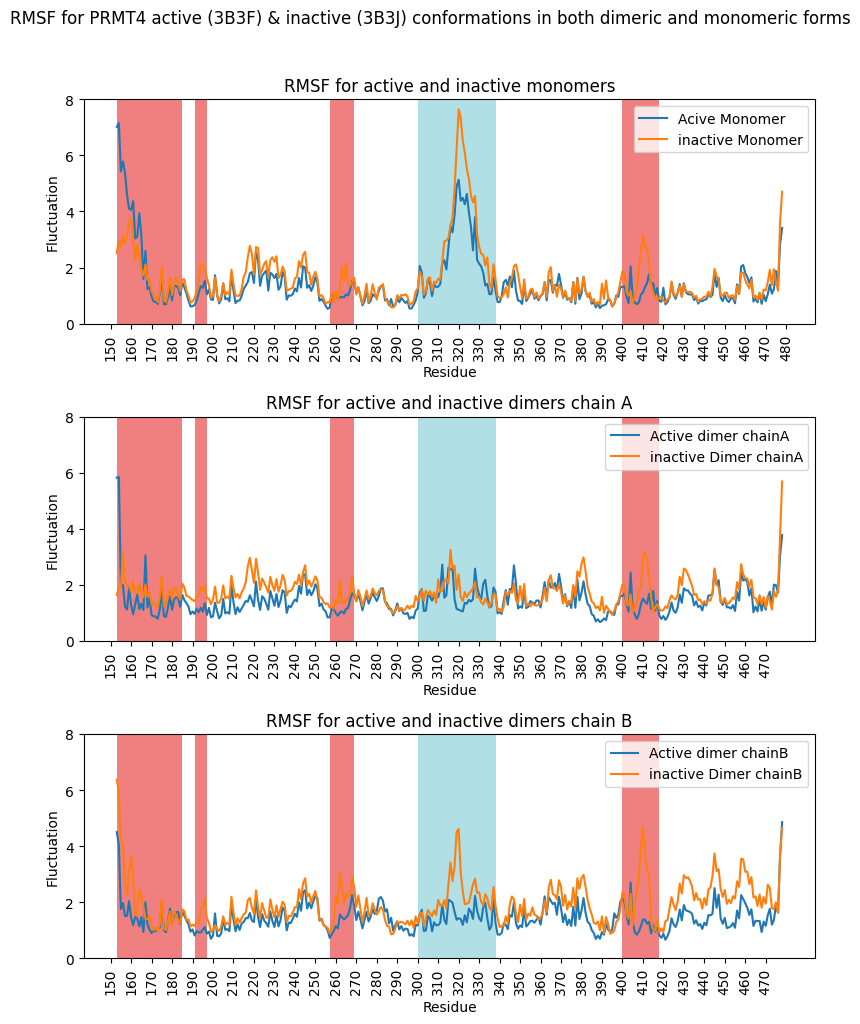

In [17]:
###### Define the start and end indices for the different chains
start_indexA = 1
end_indexA = 326
start_indexB = 327
end_indexB = 652

# Define the start and end indices for the different chains
start_indexA = 1
end_indexA = 326
start_indexB = 327
end_indexB = 652

# Create a figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Define the highlighted regions
highlighted_regions = [
    (300, 338, 'powderblue', 'Dimerization arm'),
    (153, 185, 'lightcoral', 'N-terminal helices helix Y&Z'),
    (191, 197, 'lightcoral', 'motif II'),
    (257, 269, 'lightcoral', 'Motif III'),
    (400, 418, 'lightcoral', 'Includes THW loop Motif IV')
]

# Define the start and end indices for the different chains
start_index_inactiveA = 1
end_index_inactiveA = 326
start_index_inactiveB = 327
end_index_inactiveB = 652

# Plot for subplot 1
axs[0].plot(monomer_3b3f_rmsf['Res'], monomer_3b3f_rmsf['AtomicFlx'], label='Acive Monomer')
axs[0].plot(monomer_3b3j_rmsf['Res'], monomer_3b3j_rmsf['AtomicFlx'], label='inactive Monomer')
axs[0].set_title('RMSF for active and inactive monomers')
axs[0].set_ylabel('Fluctuation')
axs[0].set_xlabel('Residue')
axs[0].legend()
#axs[0].grid(True)
axs[0].set_xticks(np.arange(150, 490, 10.0))
axs[0].set_yticks(np.arange(0, 10, 2))
axs[0].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[0].axvspan(start, end, facecolor=color, label=label)

# Plot for subplot 2
axs[1].plot(dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'Res'], dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'AtomicFlx'], label='Active dimer chainA')
axs[1].plot(dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'Res'], dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'AtomicFlx'], label='inactive Dimer chainA')
axs[1].set_title('RMSF for active and inactive dimers chain A')
axs[1].set_ylabel('Fluctuation')
axs[1].set_xlabel('Residue')
axs[1].legend()
#axs[1].grid(True)
axs[1].set_xticks(np.arange(150, 480, 10.0))
axs[1].set_yticks(np.arange(0, 10, 2))
axs[1].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[1].axvspan(start, end, facecolor=color, label=label)

# Plot for subplot 1
axs[2].plot(dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'Res'], dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'AtomicFlx'], label='Active dimer chainB')
axs[2].plot(dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'Res'], dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'AtomicFlx'], label='inactive Dimer chainB')
axs[2].set_title('RMSF for active and inactive dimers chain B')
axs[2].set_ylabel('Fluctuation')
axs[2].set_xlabel('Residue')
axs[2].legend()
#axs[2].grid(True)
axs[2].set_xticks(np.arange(150, 480, 10.0))
axs[2].set_yticks(np.arange(0, 10, 2))
axs[2].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[2].axvspan(start, end, facecolor=color, label=label)
    
# Title for the whole plot
plt.suptitle('RMSF for PRMT4 active (3B3F) & inactive (3B3J) conformations in both dimeric and monomeric forms', y=1.02)

plt.tight_layout()
plt.show()

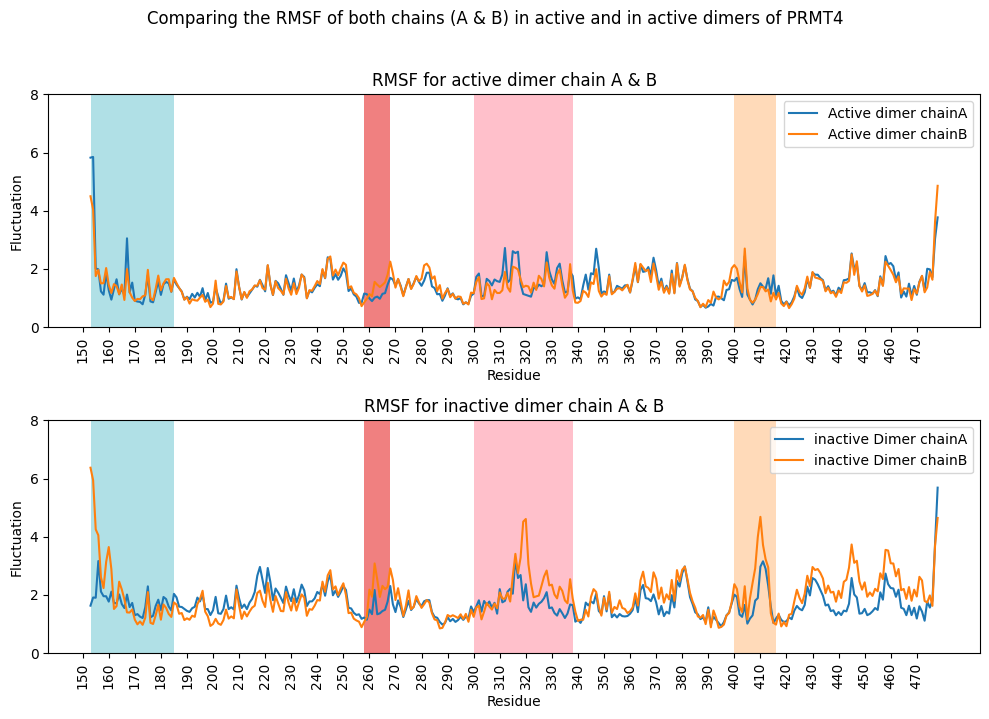

In [21]:
# Define the start and end indices for the different chains
start_indexA = 1
end_indexA = 326
start_indexB = 327
end_indexB = 652

# Create a figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 7))

# Highlighted regions
highlighted_regions = [
    (300, 338, 'pink', 'Dimerization arm'),
    (153, 185, 'powderblue', 'N-terminal helices helix Y&Z'),
    (258, 268, 'lightcoral', 'Includes Double E-loop'),
    (400, 416, 'peachpuff', 'Includes THW loop')
]


# Define the start and end indices for the different chains
start_index_inactiveA = 1
end_index_inactiveA = 326
start_index_inactiveB = 327
end_index_inactiveB = 652

# Plot for subplot 1
axs[0].plot(dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'Res'], dimer_3b3f_rmsf.loc[start_indexA:end_indexA, 'AtomicFlx'], label='Active dimer chainA')
axs[0].plot(dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'Res'], dimer_3b3f_rmsf.loc[start_indexB:end_indexB, 'AtomicFlx'], label='Active dimer chainB')
axs[0].set_title('RMSF for active dimer chain A & B')
axs[0].set_ylabel('Fluctuation')
axs[0].set_xlabel('Residue')
axs[0].legend()
#axs[0].grid(True)
axs[0].set_xticks(np.arange(150, 480, 10.0))
axs[0].set_yticks(np.arange(0, 10, 2))
axs[0].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[0].axvspan(start, end, facecolor=color, label=label)

# Plot for subplot 1
axs[1].plot(dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'Res'], dimer_3b3j_rmsf.loc[start_index_inactiveA:end_index_inactiveA, 'AtomicFlx'], label='inactive Dimer chainA')
axs[1].plot(dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'Res'], dimer_3b3j_rmsf.loc[start_index_inactiveB:end_index_inactiveB, 'AtomicFlx'], label='inactive Dimer chainB')
axs[1].set_title('RMSF for inactive dimer chain A & B')
axs[1].set_ylabel('Fluctuation')
axs[1].set_xlabel('Residue')
axs[1].legend()
#axs[1].grid(True)
axs[1].set_xticks(np.arange(150, 480, 10.0))
axs[1].set_yticks(np.arange(0, 10, 2))
axs[1].tick_params(axis='x', rotation=90)
# Plot for subplot 1
for start, end, color, label in highlighted_regions:
    axs[1].axvspan(start, end, facecolor=color, label=label)
    
# Title for the whole plot
plt.suptitle('Comparing the RMSF of both chains (A & B) in active and in active dimers of PRMT4', y=1.02)

plt.tight_layout()
plt.show()

# Correlation

In [2]:
corrmatactiveD=pd.read_csv('../../3b3f/dimer/analysis_800/corr_3b3f_Dimer800.dat',sep=r'\s+')
corrmatactiveM=pd.read_csv('../../3b3f/monomer/analysis_800/corr_3b3f_Monomer800.dat',sep=r'\s+')
corrmatinactiveD=pd.read_csv('../../3b3j/dimer/analysis_800/corr_3b3j_Dimer800.dat',sep=r'\s+')
corrmatinactiveM=pd.read_csv('../../3b3j/monomer/analysis_800/corr_3b3j_Monomer800.dat',sep=r'\s+')

#Renaming the first column
corrmatactiveD.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
corrmatactiveM.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
corrmatinactiveD.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)
corrmatinactiveM.rename(columns={'#Residue-Residue': 'R-R'}, inplace=True)


corrFilesList= (corrmatactiveD, corrmatactiveM,corrmatinactiveD, corrmatinactiveM)
for df in corrFilesList:
    first_column_label = df.columns[0]  # Assuming the first column is at index 0
    df.drop(first_column_label, axis=1, inplace=True)

In [3]:
corrmatactiveD.tail()

1       2       3       4       5       6       7       8       9  \
647  0.0422  0.0650  0.1253  0.1667  0.1844  0.2029  0.1312  0.1118  0.1993   
648  0.0388  0.0563  0.1031  0.1373  0.1441  0.1548  0.1041  0.0875  0.1427   
649  0.0308  0.0515  0.0958  0.1237  0.1224  0.1380  0.0801  0.0742  0.1297   
650  0.0346  0.0469  0.0887  0.1100  0.1045  0.1126  0.0702  0.0623  0.0996   
651  0.0184  0.0325  0.0586  0.0744  0.0742  0.0866  0.0428  0.0433  0.0743   

         10  ...     643     644     645     646     647     648     649  \
647  0.1008  ...  0.3795  0.3698  0.4052  0.4366  0.5782  0.0000  0.5160   
648  0.0737  ...  0.3191  0.2982  0.3416  0.3842  0.5049  0.5160  0.0000   
649  0.0403  ...  0.2547  0.2372  0.2633  0.3052  0.3720  0.5208  0.5598   
650  0.0323  ...  0.2004  0.1875  0.2132  0.2598  0.3154  0.3841  0.5158   
651  0.0303  ...  0.1345  0.1252  0.1413  0.1752  0.2029  0.2859  0.3413   

        650     651     652  
647  0.5208  0.3841  0.2859  
648  0.5598  0.5158  0.3413  
649  0.0000  0.5902  0.4667  
650  0.5902  0.0000  0.5426  
651  0.4667  0.5426  0.0000  

[5 rows x 652 columns]

In [4]:
#Rename the residues of the activeD correlation dataframes
activeDcorrList = (corrmatactiveD)

# Generate new column names
new_column_names = [f"{i}A" for i in range(153, 479)]
new_column_names.extend([f"{i}B" for i in range(153, 479)])
# Append 'SAHA' and 'SAHB' to the list
#new_column_names.extend(['SAHA', 'SAHB'])
activeDcorrList.columns = new_column_names

# Generate new row names
new_row_names = [f"{i}A" for i in range(153, 479)]
new_row_names.extend([f"{i}B" for i in range(153, 479)])
# Append 'SAHA' and 'SAHB' to the list
#new_row_names.extend(['SAHA', 'SAHB'])
activeDcorrList.index = new_row_names

# Display the DataFrame with new column names
corrmatactiveD.head()


153A    154A    155A    156A    157A    158A    159A    160A    161A  \
153A  0.0000  0.5047  0.4461  0.3404  0.2600  0.2749  0.3338  0.3076  0.2061   
154A  0.5047  0.0000  0.5959  0.4312  0.3387  0.3545  0.4202  0.3901  0.2785   
155A  0.4461  0.5959  0.0000  0.6026  0.5039  0.4727  0.4929  0.4867  0.3568   
156A  0.3404  0.4312  0.6026  0.0000  0.5472  0.5316  0.5251  0.4487  0.3816   
157A  0.2600  0.3387  0.5039  0.5472  0.0000  0.7031  0.5161  0.5949  0.5788   

        162A  ...    469B    470B    471B    472B    473B    474B    475B  \
153A  0.1890  ...  0.0183 -0.0052  0.0144  0.0428  0.0499  0.0422  0.0388   
154A  0.2500  ...  0.0493  0.0226  0.0480  0.0802  0.0759  0.0650  0.0563   
155A  0.2813  ...  0.0787  0.0530  0.0836  0.1220  0.1216  0.1253  0.1031   
156A  0.2924  ...  0.1698  0.1286  0.1640  0.2081  0.1839  0.1667  0.1373   
157A  0.4131  ...  0.1616  0.1224  0.1568  0.1909  0.1804  0.1844  0.1441   

        476B    477B    478B  
153A  0.0308  0.0346  0.0184  
154A  0.0515  0.0469  0.0325  
155A  0.0958  0.0887  0.0586  
156A  0.1237  0.1100  0.0744  
157A  0.1224  0.1045  0.0742  

[5 rows x 652 columns]

In [5]:
#Rename the residues of the activeM correlation dataframes
activeMcorrList = (corrmatactiveM)
# Generate new column names
new_column_namesactiveM = [f"{i}A" for i in range(153, 479)]
activeMcorrList.columns = new_column_namesactiveM

# Generate new row names
new_row_namesactiveM = [f"{i}A" for i in range(153, 479)]
activeMcorrList.index = new_row_namesactiveM

# Display the DataFrame with new column names
corrmatactiveM.head()

153A    154A    155A    156A    157A    158A    159A    160A    161A  \
153A  0.0000  0.5954  0.5550  0.4439  0.2906  0.3206  0.4085  0.3251  0.1982   
154A  0.5954  0.0000  0.6496  0.4640  0.3520  0.3850  0.4975  0.4161  0.2502   
155A  0.5550  0.6496  0.0000  0.6948  0.5351  0.5096  0.5648  0.4846  0.3111   
156A  0.4439  0.4640  0.6948  0.0000  0.5710  0.5845  0.5797  0.4414  0.3294   
157A  0.2906  0.3520  0.5351  0.5710  0.0000  0.7089  0.5222  0.5824  0.5051   

        162A  ...    469A    470A    471A    472A    473A    474A    475A  \
153A  0.2111  ... -0.0462 -0.0229 -0.0316 -0.0314 -0.0207 -0.0406 -0.0071   
154A  0.2661  ... -0.0380 -0.0154 -0.0272 -0.0298 -0.0147 -0.0330  0.0079   
155A  0.2885  ... -0.0970 -0.0759 -0.0941 -0.0922 -0.0742 -0.0953 -0.0422   
156A  0.2944  ... -0.0882 -0.0606 -0.0767 -0.0810 -0.0733 -0.0909 -0.0447   
157A  0.3829  ... -0.0830 -0.0660 -0.0868 -0.0943 -0.0798 -0.0977 -0.0619   

        476A    477A    478A  
153A -0.0360 -0.0109  0.0051  
154A -0.0377 -0.0017  0.0020  
155A -0.0874 -0.0376 -0.0261  
156A -0.0814 -0.0380 -0.0206  
157A -0.0927 -0.0396 -0.0275  

[5 rows x 326 columns]

In [6]:
##Rename the residues of the inactiveD correlation dataframes
inactiveDcorrList = (corrmatinactiveD)

# Generate new column names
new_column_namesinactiveD = [f"{i}A" for i in range(153, 479)]
new_column_namesinactiveD.extend([f"{i}B" for i in range(153, 479)])
inactiveDcorrList.columns = new_column_namesinactiveD

# Generate new row names
new_row_namesinactiveD = [f"{i}A" for i in range(153, 479)]
new_row_namesinactiveD.extend([f"{i}B" for i in range(153, 479)])
inactiveDcorrList.index = new_row_namesinactiveD

# Display the DataFrame with new column names
corrmatinactiveD.head()


153A    154A    155A    156A    157A    158A    159A    160A    161A  \
153A  0.0000  0.6448  0.5118  0.3582  0.3948  0.2832  0.2058  0.1702  0.1966   
154A  0.6448  0.0000  0.6298  0.4144  0.5348  0.3652  0.2826  0.2360  0.2622   
155A  0.5118  0.6298  0.0000  0.6395  0.6080  0.4446  0.3278  0.2822  0.2962   
156A  0.3582  0.4144  0.6395  0.0000  0.5945  0.4516  0.3252  0.2936  0.2966   
157A  0.3948  0.5348  0.6080  0.5945  0.0000  0.6392  0.4235  0.3907  0.4291   

        162A  ...    469B    470B    471B    472B    473B    474B    475B  \
153A  0.2625  ...  0.0152  0.0243  0.0526  0.0901  0.0941  0.1062  0.1100   
154A  0.3413  ...  0.0552  0.0620  0.0921  0.1334  0.1277  0.1479  0.1403   
155A  0.2829  ...  0.1036  0.1031  0.1406  0.1867  0.1912  0.2007  0.2025   
156A  0.2642  ...  0.1207  0.1143  0.1447  0.1853  0.1916  0.2073  0.2006   
157A  0.3650  ...  0.1495  0.1425  0.1801  0.2233  0.2340  0.2661  0.2574   

        476B    477B    478B  
153A  0.0512  0.0668  0.0326  
154A  0.0618  0.0804  0.0367  
155A  0.1124  0.1194  0.0625  
156A  0.1104  0.1214  0.0641  
157A  0.1351  0.1486  0.0658  

[5 rows x 652 columns]

In [7]:
#Rename the residues of the inactiveM correlation dataframes
inactiveMcorrList = (corrmatinactiveM)
# Generate new column names
new_column_namesinactiveM = [f"{i}A" for i in range(153, 479)]
inactiveMcorrList.columns = new_column_namesinactiveM

# Generate new row names
new_row_namesinactiveM = [f"{i}A" for i in range(153, 479)]
inactiveMcorrList.index = new_row_namesinactiveM

# Display the DataFrame with new column names
corrmatinactiveM.head()

153A    154A    155A    156A    157A    158A    159A    160A    161A  \
153A  0.0000  0.6188  0.5268  0.4056  0.3575  0.2566  0.2528  0.1515  0.1720   
154A  0.6188  0.0000  0.6573  0.5634  0.5428  0.3954  0.2979  0.2279  0.3143   
155A  0.5268  0.6573  0.0000  0.6684  0.6164  0.5217  0.4359  0.3027  0.3255   
156A  0.4056  0.5634  0.6684  0.0000  0.7139  0.4990  0.3005  0.2493  0.3685   
157A  0.3575  0.5428  0.6164  0.7139  0.0000  0.7436  0.4573  0.4596  0.5846   

        162A  ...    469A    470A    471A    472A    473A    474A    475A  \
153A  0.4137  ...  0.0545  0.0721  0.0729  0.1013  0.1215  0.1368  0.2901   
154A  0.5019  ...  0.0602  0.0823  0.0872  0.0993  0.1137  0.1157  0.2584   
155A  0.5683  ...  0.0479  0.0602  0.0690  0.0824  0.0996  0.1041  0.2529   
156A  0.4306  ...  0.0975  0.0983  0.1139  0.1255  0.1496  0.1568  0.3210   
157A  0.5616  ...  0.0553  0.0641  0.0680  0.0731  0.0942  0.0973  0.2316   

        476A    477A    478A  
153A  0.1602  0.1666  0.1076  
154A  0.1563  0.1961  0.1176  
155A  0.1616  0.2132  0.1443  
156A  0.2256  0.2768  0.1761  
157A  0.1312  0.2072  0.1346  

[5 rows x 326 columns]

In [8]:
#converting the dataframes to NumPy arrays to be visualized
corrmatactiveD.to_numpy()
corrmatactiveM.to_numpy()
corrmatinactiveD.to_numpy()
corrmatinactiveM.to_numpy()

print(corrmatactiveD)

        153A    154A    155A    156A    157A    158A    159A    160A    161A  \
153A  0.0000  0.5047  0.4461  0.3404  0.2600  0.2749  0.3338  0.3076  0.2061   
154A  0.5047  0.0000  0.5959  0.4312  0.3387  0.3545  0.4202  0.3901  0.2785   
155A  0.4461  0.5959  0.0000  0.6026  0.5039  0.4727  0.4929  0.4867  0.3568   
156A  0.3404  0.4312  0.6026  0.0000  0.5472  0.5316  0.5251  0.4487  0.3816   
157A  0.2600  0.3387  0.5039  0.5472  0.0000  0.7031  0.5161  0.5949  0.5788   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
474B  0.0422  0.0650  0.1253  0.1667  0.1844  0.2029  0.1312  0.1118  0.1993   
475B  0.0388  0.0563  0.1031  0.1373  0.1441  0.1548  0.1041  0.0875  0.1427   
476B  0.0308  0.0515  0.0958  0.1237  0.1224  0.1380  0.0801  0.0742  0.1297   
477B  0.0346  0.0469  0.0887  0.1100  0.1045  0.1126  0.0702  0.0623  0.0996   
478B  0.0184  0.0325  0.0586  0.0744  0.0742  0.0866  0.0428  0.0433  0.0743   

        162A  ...    469B    470B    47

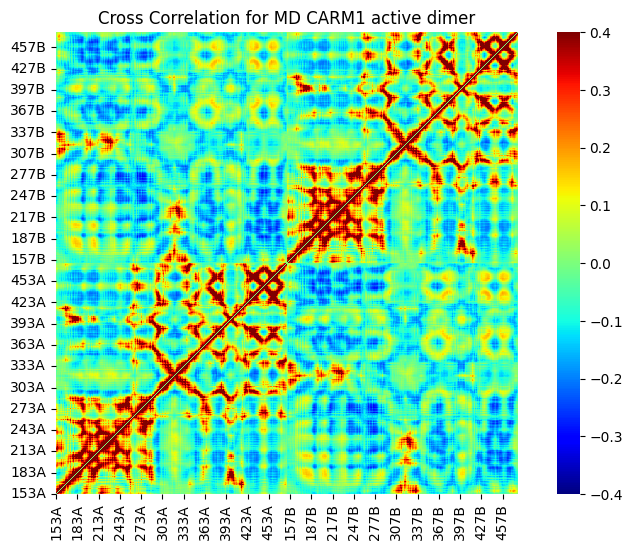

In [13]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))
plt.title("Cross Correlation for MD CARM1 active dimer")
sns.heatmap(corrmatactiveD, center=0, xticklabels=30, yticklabels=30, square=True,cmap='jet',vmin=-0.4, vmax=0.4)
plt.gca().invert_yaxis()

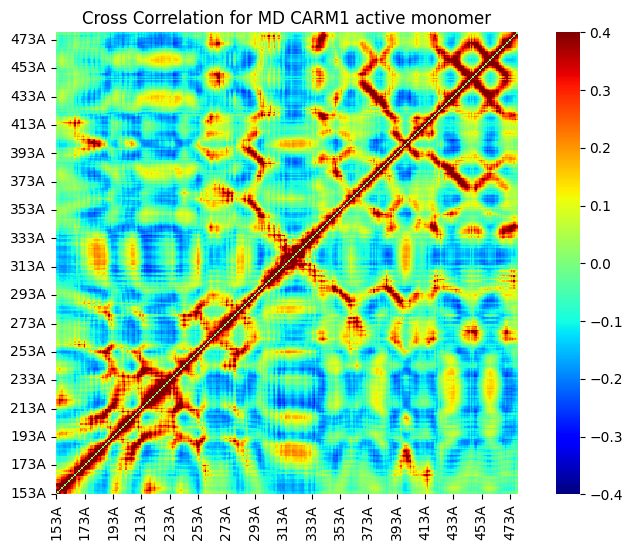

In [14]:
##### %matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))
plt.title("Cross Correlation for MD CARM1 active monomer")
sns.heatmap(corrmatactiveM, center=0, xticklabels=20, yticklabels=20, square=True,cmap='jet',vmin=-0.4, vmax=0.4)
plt.yticks(rotation=0) 
plt.gca().invert_yaxis()

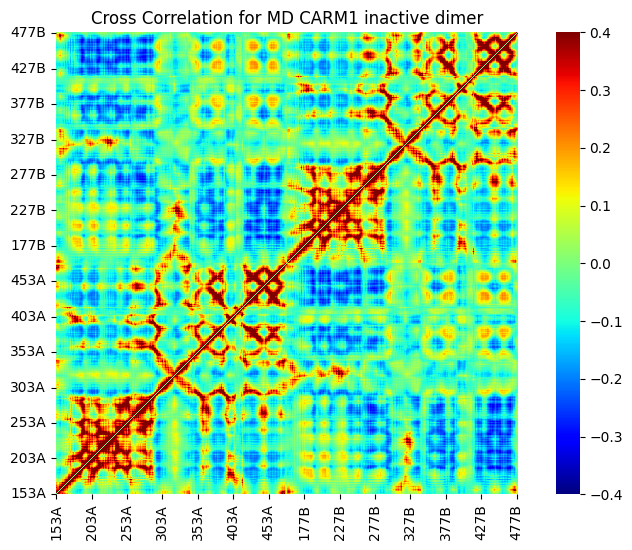

In [15]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))
plt.title("Cross Correlation for MD CARM1 inactive dimer")
sns.heatmap(corrmatinactiveD, center=0, xticklabels=50, yticklabels=50, square=True,cmap='jet',vmin=-0.4, vmax=0.4)
plt.gca().invert_yaxis()

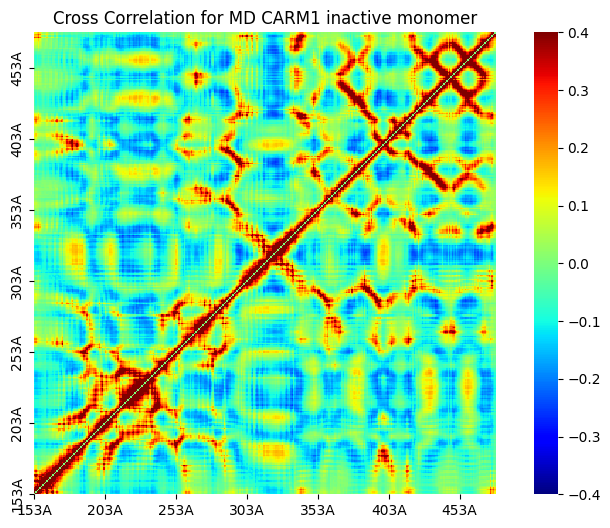

In [20]:
%matplotlib inline
# Create the heatmap
plt.figure(figsize=(10, 6))
plt.title("Cross Correlation for MD CARM1 inactive monomer")
sns.heatmap(corrmatinactiveM, center=0, xticklabels=50, yticklabels=50, square=True,cmap='jet',vmin=-0.4, vmax=0.4)
plt.gca().invert_yaxis()

# RoG

In [17]:
dimer_3b3f_rog = pd.read_csv('../../3b3f/dimer/analysis_800/rog_3b3f_dimer_800.dat', sep='\s+', header=None)
monomer_3b3f_rog = pd.read_csv('../../3b3f/monomer/analysis_800/rog_3b3f_monomer_800.dat', sep='\s+', header=None)
dimer_3b3j_rog = pd.read_csv('../../3b3j/dimer/analysis_800/rog_3b3j_dimer_800.dat', sep='\s+', header=None)
monomer_3b3j_rog = pd.read_csv('../../3b3j/monomer/analysis_800/rog_3b3j_monomer_800.dat', sep='\s+', header=None)
dimer_3b3f_rog.columns = ['Frames','Rog','Rog_max']
monomer_3b3f_rog.columns = ['Frames','Rog','Rog_max']
dimer_3b3j_rog.columns = ['Frames','Rog','Rog_max']
monomer_3b3j_rog.columns = ['Frames','Rog','Rog_max']
dimer_3b3f_rog = dimer_3b3f_rog.apply(pd.to_numeric, errors='coerce')
monomer_3b3f_rog = monomer_3b3f_rog.apply(pd.to_numeric, errors='coerce')
dimer_3b3j_rog = dimer_3b3j_rog.apply(pd.to_numeric, errors='coerce')
monomer_3b3j_rog = monomer_3b3j_rog.apply(pd.to_numeric, errors='coerce')

# Exclude the first row
dimer_3b3f_rog = dimer_3b3f_rog.iloc[1:]
monomer_3b3f_rog = monomer_3b3f_rog.iloc[1:]
dimer_3b3j_rog = dimer_3b3j_rog.iloc[1:]
monomer_3b3j_rog = monomer_3b3j_rog.iloc[1:]
dimer_3b3f_rog.head(), print(dimer_3b3f_rog.dtypes)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_204/2590237445.py:1: SyntaxWarning: invalid escape sequence '\s'
  dimer_3b3f_rog = pd.read_csv('../../3b3f/dimer/analysis_800/rog_3b3f_dimer_800.dat', sep='\s+', header=None)
/tmp/ipykernel_204/2590237445.py:2: SyntaxWarning: invalid escape sequence '\s'
  monomer_3b3f_rog = pd.read_csv('../../3b3f/monomer/analysis_800/rog_3b3f_monomer_800.dat', sep='\s+', header=None)
/tmp/ipykernel_204/2590237445.py:3: SyntaxWarning: invalid escape sequence '\s'
  dimer_3b3j_rog = pd.read_csv('../../3b3j/dimer/analysis_800/rog_3b3j_dimer_800.dat', sep='\s+', header=None)
/tmp/ipykernel_204/25

Frames     float64
Rog        float64
Rog_max    float64
dtype: object


(   Frames      Rog  Rog_max
 1     1.0  28.3912  38.9486
 2     2.0  28.7053  39.4427
 3     3.0  28.4547  39.9220
 4     4.0  28.4789  37.9468
 5     5.0  28.5780  39.8016,
 None)

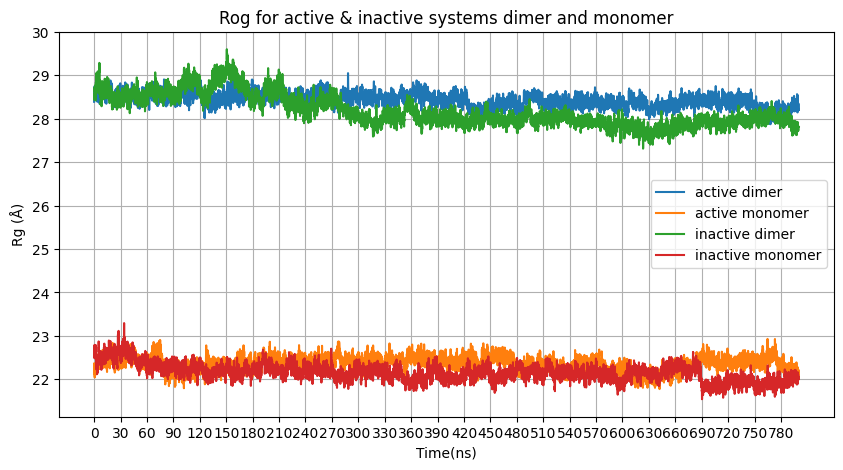

In [18]:
# Generate time axis for Rog plot. The trajectory was saved every 0.002 ns, and we have 125000 steps.
# time = nsteps * dt
total_time = 400000000 * 0.002 /1000
time = np.linspace(0, total_time, len(dimer_3b3f_rog))

%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(time, dimer_3b3f_rog['Rog'], label='active dimer')
plt.plot(time, monomer_3b3f_rog['Rog'], label='active monomer')
plt.plot(time, dimer_3b3j_rog['Rog'], label='inactive dimer')
plt.plot(time, monomer_3b3j_rog['Rog'], label='inactive monomer')
plt.xlabel('Time(ns)')
plt.ylabel('Rg (Å)')
plt.title('Rog for active & inactive systems dimer and monomer')
plt.legend()
plt.xticks(np.arange(0, 800, 30.0))
plt.grid(True)
plt.show()

## PCA

In [19]:
#pca files
dimer_3b3f_pca = pd.read_csv('../../3b3f/dimer/analysis_800/pca3b3fDimer800.dat', sep=r'\s+')
monomer_3b3f_pca = pd.read_csv('../../3b3f/monomer/analysis_800/pca3b3fMonomer800.dat', sep=r'\s+')
dimer_3b3j_pca = pd.read_csv('../../3b3j/dimer/analysis_800/pca3b3jDimer800.dat', sep=r'\s+')
monomer_3b3j_pca = pd.read_csv('../../3b3j/monomer/analysis_800/pca3b3jMonomer800.dat', sep=r'\s+')
dimer_3b3f_pca.head(), print(dimer_3b3f_pca.dtypes)

#Frame      int64
Mode1     float64
Mode2     float64
Mode3     float64
Mode4     float64
Mode5     float64
Mode6     float64
Mode7     float64
Mode8     float64
Mode9     float64
Mode10    float64
dtype: object


(   #Frame   Mode1   Mode2  Mode3   Mode4   Mode5   Mode6   Mode7  Mode8  \
 0       1  16.674 -17.485  4.916 -10.760 -11.961  -6.316  15.332  6.360   
 1       2  39.849 -36.770 -5.109 -11.365   1.586 -10.891   7.079 -3.514   
 2       3  37.490 -19.032  2.790 -10.193   0.879  -3.557   8.825 -2.180   
 3       4  43.383 -20.070  2.032  -1.058   5.428   6.399   4.153  7.743   
 4       5  40.519 -22.832 -0.609  -4.276   2.454  -8.176   0.370  5.405   
 
     Mode9  Mode10  
 0 -11.660   6.319  
 1  -2.453   9.598  
 2  -2.850   5.383  
 3  -9.542  13.504  
 4  -8.242  12.236  ,
 None)

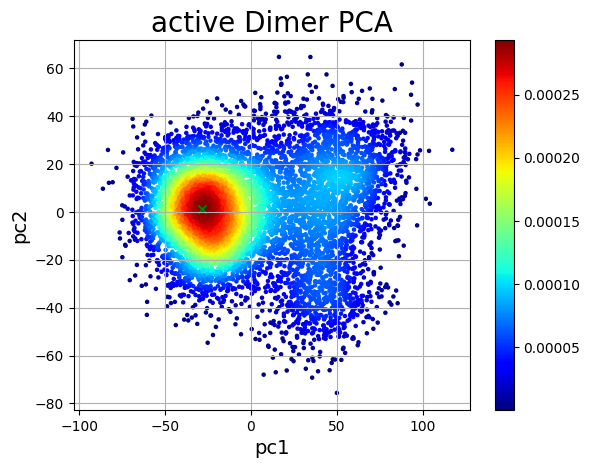

Conformation number with highest density: 5487


In [13]:
# PLOTTING activeD runs PCA
%matplotlib inline
# List of filenames
PCA_activeD_dfs = [dimer_3b3f_pca]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_activeD_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()

    # Get the indices of the points with the density value higher than 0.0004
    high_density_indices = np.where(z > 0.00010)[0]
    
    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='jet')

   
    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='green', marker='x', label='Highest Density')

    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title('active Dimer PCA', fontsize=20) 

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    #bar.set_label('Density')
    plt.grid()
    plt.show()
    print(f"Conformation number with highest density: { highest_density_index}")

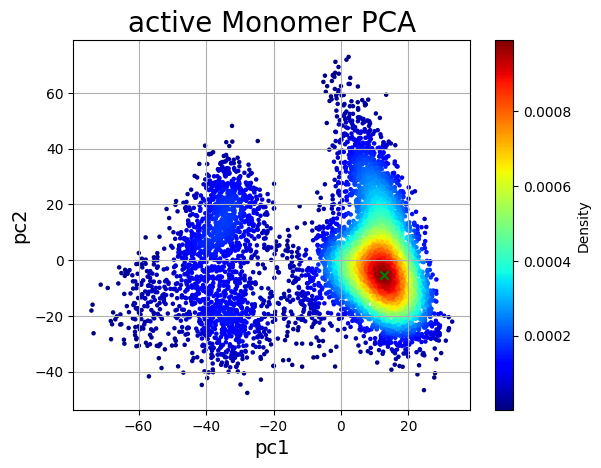

Conformation number with highest density: 1664


In [14]:
# PLOTTING activeM runs PCA
%matplotlib inline
# List of filenames
PCA_activeM_dfs = [monomer_3b3f_pca]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_activeM_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()

    # Get the indices of the points with the density value higher than 0.0004
    #high_density_indices = np.where(z > 0.0006)[0]
    
    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='jet')

   
    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='green', marker='x', label='Highest Density')

    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title('active Monomer PCA', fontsize=20) 

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    bar.set_label('Density')
    plt.grid()
    plt.show()
    print(f"Conformation number with highest density: { highest_density_index}")

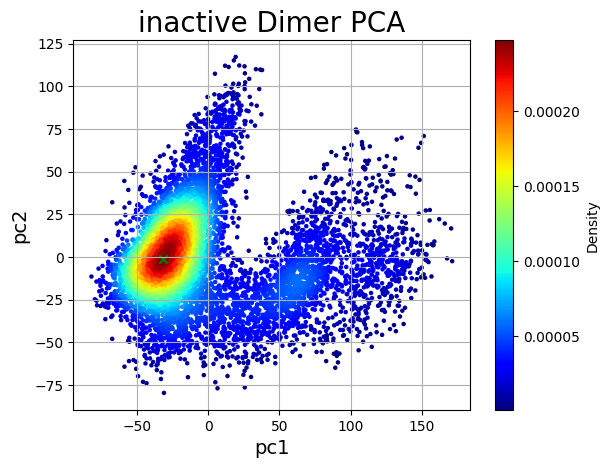

Conformation number with highest density: 4837


In [15]:
# PLOTTING inactiveD runs PCA
%matplotlib inline
# List of filenames
PCA_inactiveD_dfs = [dimer_3b3j_pca]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_inactiveD_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()


    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='jet')

   
    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='green', marker='x', label='Highest Density')

    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title('inactive Dimer PCA', fontsize=20) 

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    bar.set_label('Density')
    plt.grid()
    plt.show()
    print(f"Conformation number with highest density: { highest_density_index}")

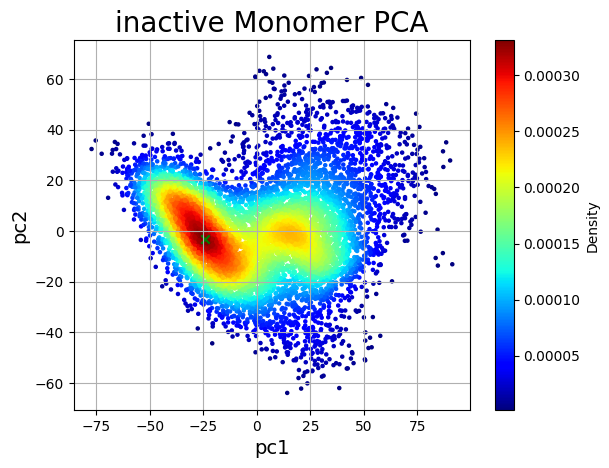

Conformation number with highest density: 4072


In [16]:
# PLOTTING inactiveM runs PCA
%matplotlib inline
# List of filenames
PCA_inactiveM_dfs = [monomer_3b3j_pca]
# Define high_density_frames list
high_density_frames = []
# Iterate over the dat files
for i, df in enumerate(PCA_inactiveM_dfs, start=1):
    pc1 = df['Mode1']
    pc2 = df['Mode2']
    xy = np.vstack([pc1, pc2])
    z = gaussian_kde(xy)(xy)
    # Get the indices of the points with the lowest density
    lowest_density_indices = np.argsort(z)[:1]  # Change 1 to the number of points you want to print
    highest_density_index = np.argmax(z)
    # Calculate the index of the density value closest to the mean density
    mean_density_index = np.abs(z - np.mean(z)).argmin()
    
    # Create the scatter plot
    fig, ax = plt.subplots()
    ax2=ax.scatter(pc1, pc2, c=z, s=5, cmap='jet')

   
    # Highlight the highest density point
    ax.scatter(pc1[highest_density_index], pc2[highest_density_index], c='green', marker='x', label='Highest Density')

    # Set plot properties
    plt.xlabel('pc1', fontsize=14)
    plt.ylabel('pc2', fontsize=14)
    plt.title('inactive Monomer PCA', fontsize=20) 

    # Display the plot in the Jupyter Notebook'
    bar = plt.colorbar(ax2)
    bar.set_label('Density')
    plt.grid()
    plt.show()
    print(f"Conformation number with highest density: { highest_density_index}")

# FEL

PC1 shape: (8000,)
PC2 shape: (8000,)
Indices of minimum energy: (30, 16)
Minimum energy value: 0.0 kcal/mol


/tmp/ipykernel_1540/2765936531.py:58: UserWarning: shading value 'red' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  c = ax.pcolormesh(xedges, yedges, free_energy, shading='red', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))


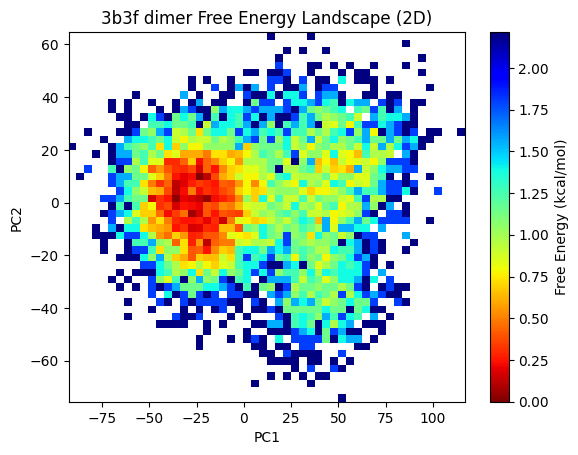

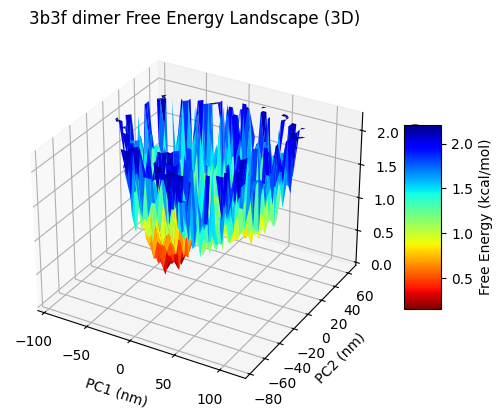

In [9]:
# 3B3F dimer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Load PC1 and PC2 data
pc1 = np.loadtxt("../../3b3f/dimer/analysis_800/3b3f_di_PC1.dat", skiprows=1, usecols=1)
pc2 = np.loadtxt("../../3b3f/dimer/analysis_800/3b3f_di_PC2.dat", skiprows=1, usecols=1)

# Ensure that pc1 and pc2 are numpy arrays
pc1 = np.asarray(pc1).flatten()
pc2 = np.asarray(pc2).flatten()

# Generate frame numbers
frames = np.arange(len(pc1))

# Check the shapes of pc1 and pc2 to ensure they are 1D arrays
print(f"PC1 shape: {pc1.shape}")
print(f"PC2 shape: {pc2.shape}")

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Create a 2D histogram
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# Assign free energy to each point
fe_per_point = np.zeros_like(pc1)

for i in range(len(pc1)):
    bin_x = np.searchsorted(xedges, pc1[i]) - 1
    bin_y = np.searchsorted(yedges, pc2[i]) - 1
    fe_per_point[i] = free_energy[bin_y, bin_x]

# Write to file with frame number, PC1, PC2, and free energy values   
output_data = np.column_stack((frames, pc1, pc2, fe_per_point))
np.savetxt('../../3b3f/dimer/analysis_800/3b3f_di_FEL_with_frames.dat', output_data, header='Frame PC1 PC2 Free_Energy', fmt='%12.8f')

# Find the indices of the lowest energy values
min_energy_indices = np.unravel_index(np.nanargmin(free_energy), free_energy.shape)
min_energy_values = free_energy[min_energy_indices]

print(f"Indices of minimum energy: {min_energy_indices}")
print(f"Minimum energy value: {min_energy_values} kcal/mol")

# 2D Plot
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')
plt.title('3b3f dimer Free Energy Landscape (2D)')
plt.show()

# 3D Plot 
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = free_energy

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet_r', edgecolor='none')
ax.set_xlabel('PC1 (nm)')
ax.set_ylabel('PC2 (nm)')
ax.set_zlabel('Energy (kcal/mol)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Free Energy (kcal/mol)')
plt.title('3b3f dimer Free Energy Landscape (3D)')

plt.show()

/home/amrabbas/.local/lib/python3.12/site-packages/mdtraj/formats/pdb/pdbfile.py:198: RuntimeWarning: divide by zero encountered in divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/home/amrabbas/.local/lib/python3.12/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


Selected Phi angles shape: (448000,)
Selected Psi angles shape: (448000,)
Indices of minimum energy (selected residues): (19, 15)
Minimum energy value (selected residues): 0.0 kcal/mol


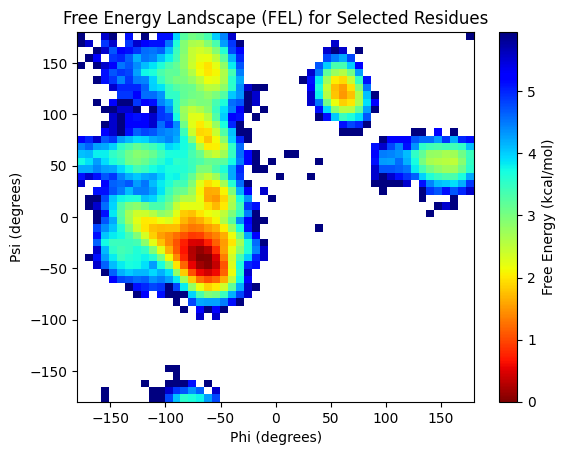

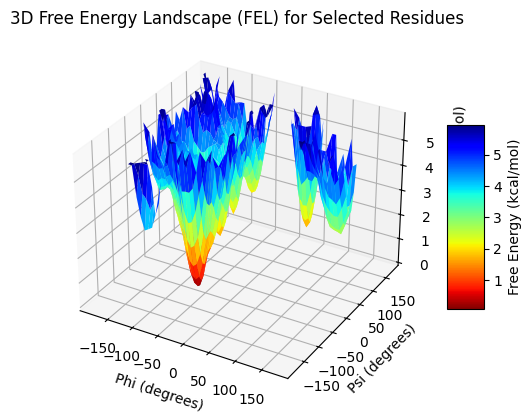

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mdtraj as md
from mpl_toolkits.mplot3d import Axes3D

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Load trajectory and topology files
traj = md.load('../../3b3f/dimer/analysis_800/concat_aligned_3b3f_dimer_md800ns_ski10.dcd', top='../../3b3f/dimer/analysis_800/3b3f_dimer_InitFrame.pdb')

# Calculate dihedral angles for specific residues (10 to 33 and 327 to 359)

# Select residues from 10 to 33 and 327 to 359 separately, then combine them
residues_10_33 = traj.topology.select('resid 10 to 33')
residues_327_359 = traj.topology.select('resid 327 to 359')
combined_residues = np.concatenate([residues_10_33, residues_327_359])

# Slicing trajectory for selected residues
traj_selected = traj.atom_slice(combined_residues)

# Compute phi and psi angles for the selected residues only
phi_indices_sel, phi_angles_sel = md.compute_phi(traj_selected)  # Compute phi angles
psi_indices_sel, psi_angles_sel = md.compute_psi(traj_selected)  # Compute psi angles

# Convert radians to degrees for selected residues
phi_angles_sel = np.rad2deg(phi_angles_sel)
psi_angles_sel = np.rad2deg(psi_angles_sel)

# Flatten arrays for easy manipulation
phi_angles_sel_flat = phi_angles_sel.flatten()
psi_angles_sel_flat = psi_angles_sel.flatten()

# Check shapes to ensure they are 1D arrays for selected residues
print(f"Selected Phi angles shape: {phi_angles_sel_flat.shape}")
print(f"Selected Psi angles shape: {psi_angles_sel_flat.shape}")

# Generate frame numbers for selected residues
frames_selected = np.arange(len(phi_angles_sel_flat))

# 2D histogram (free energy landscape) for selected residues
H, xedges, yedges = np.histogram2d(phi_angles_sel_flat, psi_angles_sel_flat, bins=50, density=True)

# Calculate the free energy for selected residues
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy for selected residues
free_energy -= np.nanmin(free_energy)

# Assign free energy to each point for selected residues
fe_per_point_sel = np.zeros_like(phi_angles_sel_flat)

for i in range(len(phi_angles_sel_flat)):
    bin_x = np.searchsorted(xedges, phi_angles_sel_flat[i]) - 1
    bin_y = np.searchsorted(yedges, psi_angles_sel_flat[i]) - 1
    fe_per_point_sel[i] = free_energy[bin_y, bin_x]

# Write to file with frame number, Phi, Psi, and free energy values for selected residues
output_data_sel = np.column_stack((frames_selected, phi_angles_sel_flat, psi_angles_sel_flat, fe_per_point_sel))
np.savetxt('dihedrals_FEL_selected_residues.dat', output_data_sel, header='Frame Phi Psi Free_Energy', fmt='%12.8f')

# Find the indices of the lowest energy values for selected residues
min_energy_indices_sel = np.unravel_index(np.nanargmin(free_energy), free_energy.shape)
min_energy_values_sel = free_energy[min_energy_indices_sel]

print(f"Indices of minimum energy (selected residues): {min_energy_indices_sel}")
print(f"Minimum energy value (selected residues): {min_energy_values_sel} kcal/mol")

# 2D Plot for Free Energy Landscape (FEL) for selected residues
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('Phi (degrees)')
ax.set_ylabel('Psi (degrees)')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')
plt.title('Free Energy Landscape (FEL) for Selected Residues')
plt.show()
  
# 3D Plot for Free Energy Landscape (FEL) of selected residues
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = free_energy

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet_r', edgecolor='none')
ax.set_xlabel('Phi (degrees)')
ax.set_ylabel('Psi (degrees)')
ax.set_zlabel('Free Energy (kcal/mol)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Free Energy (kcal/mol)')
plt.title('3D Free Energy Landscape (FEL) for Selected Residues')

plt.show()

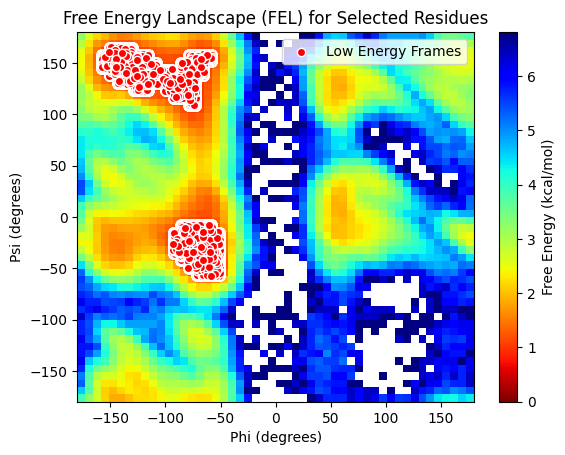

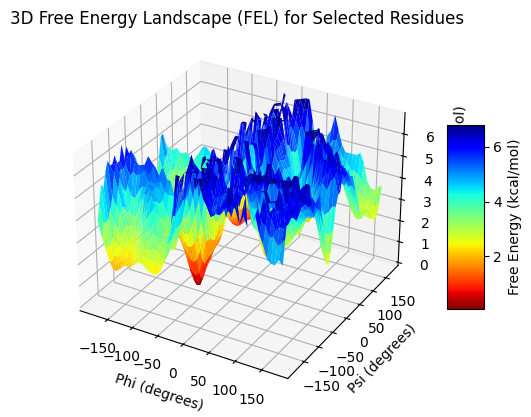

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mdtraj as md

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Load trajectory and topology files
traj = md.load('../../3b3f/dimer/analysis_800/concat_aligned_3b3f_dimer_md800ns_ski10.dcd', top='../../3b3f/dimer/analysis_800/3b3f_dimer_InitFrame.pdb')

# Select residues from 1 to 33 and 327 to 359 separately, then combine them
residues_1_33 = traj.topology.select('resid 1 to 33')
residues_327_359 = traj.topology.select('resid 327 to 359')
combined_residues = np.concatenate([residues_1_33, residues_327_359])

# Compute phi and psi angles for the selected residues
phi_indices, phi_angles = md.compute_phi(traj, periodic=False)
psi_indices, psi_angles = md.compute_psi(traj, periodic=False)

# Convert radians to degrees
phi_angles = np.rad2deg(phi_angles)
psi_angles = np.rad2deg(psi_angles)

# Flatten angles for easy manipulation
phi_angles_flat = phi_angles.flatten()
psi_angles_flat = psi_angles.flatten()

# Original frame indices
original_frames = np.repeat(np.arange(traj.n_frames), len(combined_residues))

# 2D histogram (free energy landscape)
H, xedges, yedges = np.histogram2d(phi_angles_flat, psi_angles_flat, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# Assign free energy to each point
fe_per_point = np.zeros_like(phi_angles_flat)

for i in range(len(phi_angles_flat)):
    bin_x = np.searchsorted(xedges, phi_angles_flat[i]) - 1
    bin_y = np.searchsorted(yedges, psi_angles_flat[i]) - 1
    fe_per_point[i] = free_energy[bin_y, bin_x]

# Set a threshold for low-energy frames
low_energy_threshold = 1.0  # Adjust this threshold based on your FEL analysis

# Extract indices of frames with free energy below the threshold
low_energy_indices = [i for i, fe in enumerate(fe_per_point) if fe < low_energy_threshold]

# Prepare the data for writing to a file, including the original frame index
low_energy_data = [(original_frames[i], phi_angles_flat[i], psi_angles_flat[i], fe_per_point[i]) for i in low_energy_indices]

# Write to file with original frame indices
with open('low_energy_frames.txt', 'w') as f:
    f.write('Original Frame Index - Phi - Psi - Free Energy\n')
    for original_index, phi, psi, fe in low_energy_data:
        f.write(f"{original_index + 1} - {phi:.4f} - {psi:.4f} - {fe:.4f}\n")  # +1 for 1-based indexing

# 2D Plot for Free Energy Landscape (FEL)
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('Phi (degrees)')
ax.set_ylabel('Psi (degrees)')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')
plt.title('Free Energy Landscape (FEL) for Selected Residues')

# Mark low-energy frames on the plot
if low_energy_indices:
    ax.scatter(phi_angles_flat[low_energy_indices], psi_angles_flat[low_energy_indices], color='red', label='Low Energy Frames', edgecolor='white')

plt.legend()
plt.show()

# 3D Plot for Free Energy Landscape (FEL)
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = free_energy

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet_r', edgecolor='none')
ax.set_xlabel('Phi (degrees)')
ax.set_ylabel('Psi (degrees)')
ax.set_zlabel('Free Energy (kcal/mol)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Free Energy (kcal/mol)')
plt.title('3D Free Energy Landscape (FEL) for Selected Residues')

plt.show()


PC1 shape: (8000,)
PC2 shape: (8000,)
Indices of minimum energy: (17, 40)
Minimum energy value: 0.0 kcal/mol


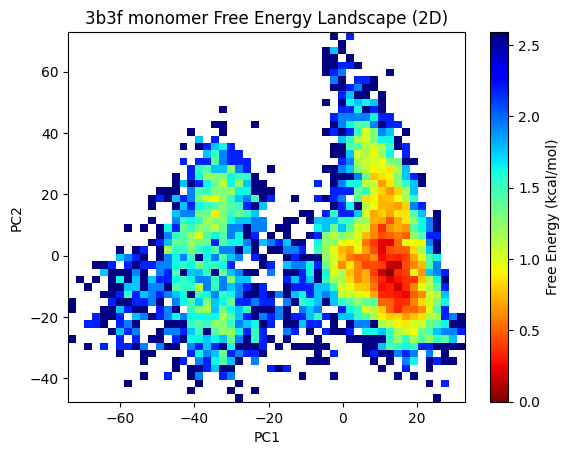

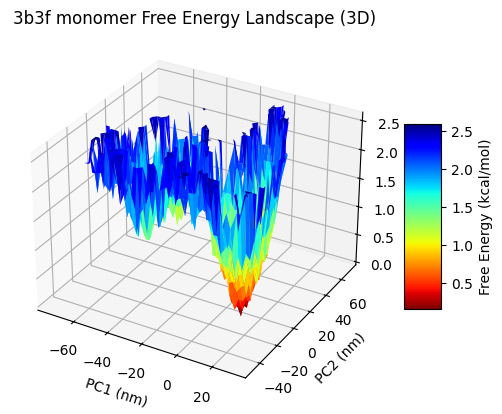

In [89]:
# 3B3F monomer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Load PC1 and PC2 data
pc1 = np.loadtxt("../../3b3f/monomer/analysis_800/3b3f_mono_PC1.dat", skiprows=1, usecols=1)
pc2 = np.loadtxt("../../3b3f/monomer/analysis_800/3b3f_mono_PC2.dat", skiprows=1, usecols=1)

# Ensure that pc1 and pc2 are numpy arrays
pc1 = np.asarray(pc1).flatten()
pc2 = np.asarray(pc2).flatten()

# Generate frame numbers
frames = np.arange(len(pc1))

# Check the shapes of pc1 and pc2 to ensure they are 1D arrays
print(f"PC1 shape: {pc1.shape}")
print(f"PC2 shape: {pc2.shape}")

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Create a 2D histogram
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# Assign free energy to each point
fe_per_point = np.zeros_like(pc1)

for i in range(len(pc1)):
    bin_x = np.searchsorted(xedges, pc1[i]) - 1
    bin_y = np.searchsorted(yedges, pc2[i]) - 1
    fe_per_point[i] = free_energy[bin_y, bin_x]

# Write to file with frame number, PC1, PC2, and free energy values   
output_data = np.column_stack((frames, pc1, pc2, fe_per_point))
np.savetxt('../../3b3f/monomer/analysis_800/3b3f_mono_FEL_with_frames.dat', output_data, header='Frame PC1 PC2 Free_Energy', fmt='%12.8f')

# Find the indices of the lowest energy values
min_energy_indices = np.unravel_index(np.nanargmin(free_energy), free_energy.shape)
min_energy_values = free_energy[min_energy_indices]

print(f"Indices of minimum energy: {min_energy_indices}")
print(f"Minimum energy value: {min_energy_values} kcal/mol")

# 2D Plot
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')
plt.title('3b3f monomer Free Energy Landscape (2D)')

plt.show()

# 3D Plot 
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = free_energy

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet_r', edgecolor='none')
ax.set_xlabel('PC1 (nm)')
ax.set_ylabel('PC2 (nm)')
ax.set_zlabel('Energy (kcal/mol)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Free Energy (kcal/mol)')
plt.title('3b3f monomer Free Energy Landscape (3D)')

plt.show()

PC1 shape: (8000,)
PC2 shape: (8000,)
Indices of minimum energy: (21, 10)
Minimum energy value: 0.0 kcal/mol


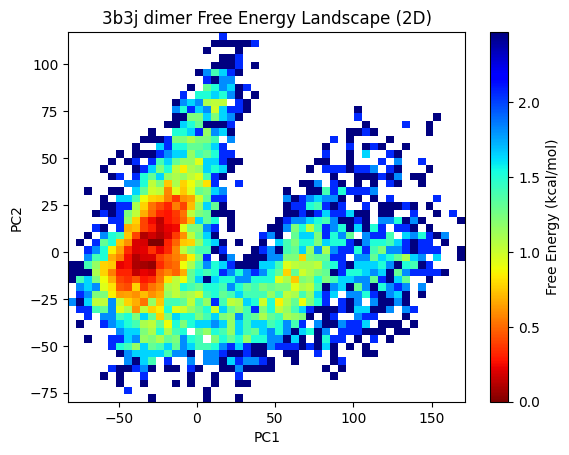

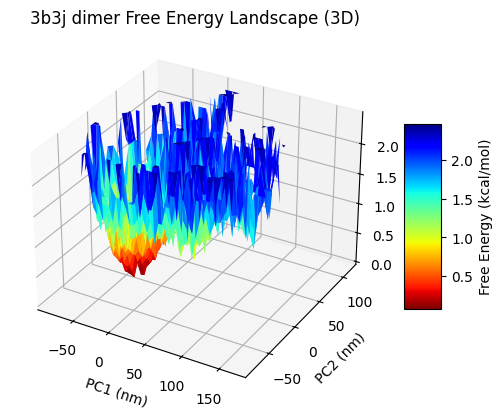

In [91]:
# 3B3J dimer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Load PC1 and PC2 data
pc1 = np.loadtxt("../../3b3j/dimer/analysis_800/3b3j_di_PC1.dat", skiprows=1, usecols=1)
pc2 = np.loadtxt("../../3b3j/dimer/analysis_800/3b3j_di_PC2.dat", skiprows=1, usecols=1)

# Ensure that pc1 and pc2 are numpy arrays
pc1 = np.asarray(pc1).flatten()
pc2 = np.asarray(pc2).flatten()

# Generate frame numbers
frames = np.arange(len(pc1))

# Check the shapes of pc1 and pc2 to ensure they are 1D arrays
print(f"PC1 shape: {pc1.shape}")
print(f"PC2 shape: {pc2.shape}")

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Create a 2D histogram
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# Assign free energy to each point
fe_per_point = np.zeros_like(pc1)

for i in range(len(pc1)):
    bin_x = np.searchsorted(xedges, pc1[i]) - 1
    bin_y = np.searchsorted(yedges, pc2[i]) - 1
    fe_per_point[i] = free_energy[bin_y, bin_x]

# Write to file with frame number, PC1, PC2, and free energy values   
output_data = np.column_stack((frames, pc1, pc2, fe_per_point))
np.savetxt('../../3b3j/dimer/analysis_800/3b3j_di_FEL_with_frames.dat', output_data, header='Frame PC1 PC2 Free_Energy', fmt='%12.8f')

# Find the indices of the lowest energy values
min_energy_indices = np.unravel_index(np.nanargmin(free_energy), free_energy.shape)
min_energy_values = free_energy[min_energy_indices]

print(f"Indices of minimum energy: {min_energy_indices}")
print(f"Minimum energy value: {min_energy_values} kcal/mol")

# 2D Plot
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')
plt.title('3b3j dimer Free Energy Landscape (2D)')

plt.show()

# 3D Plot 
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = free_energy

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet_r', edgecolor='none')
ax.set_xlabel('PC1 (nm)')
ax.set_ylabel('PC2 (nm)')
ax.set_zlabel('Energy (kcal/mol)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Free Energy (kcal/mol)')
plt.title('3b3j dimer Free Energy Landscape (3D)')

plt.show()

PC1 shape: (8000,)
PC2 shape: (8000,)
Indices of minimum energy: (21, 16)
Minimum energy value: 0.0 kcal/mol


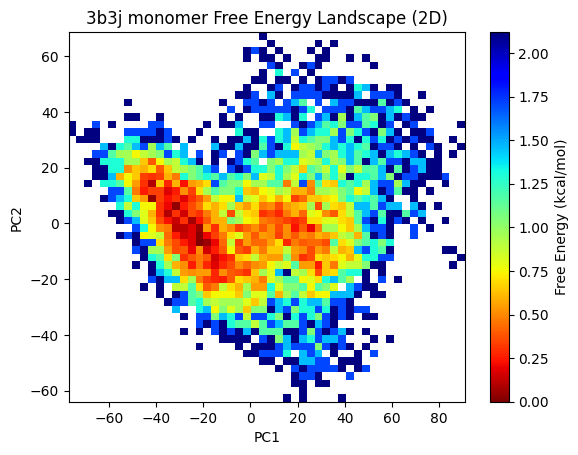

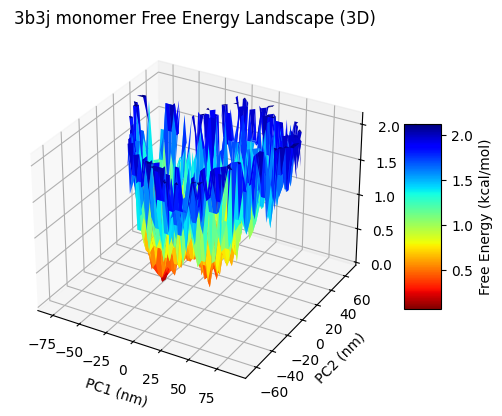

In [92]:
# 3B3J monomer
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Load PC1 and PC2 data
pc1 = np.loadtxt("../../3b3j/monomer/analysis_800/3b3j_mono_PC1.dat", skiprows=1, usecols=1)
pc2 = np.loadtxt("../../3b3j/monomer/analysis_800/3b3j_mono_PC2.dat", skiprows=1, usecols=1)

# Ensure that pc1 and pc2 are numpy arrays
pc1 = np.asarray(pc1).flatten()
pc2 = np.asarray(pc2).flatten()

# Generate frame numbers
frames = np.arange(len(pc1))

# Check the shapes of pc1 and pc2 to ensure they are 1D arrays
print(f"PC1 shape: {pc1.shape}")
print(f"PC2 shape: {pc2.shape}")

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Create a 2D histogram
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# Assign free energy to each point
fe_per_point = np.zeros_like(pc1)

for i in range(len(pc1)):
    bin_x = np.searchsorted(xedges, pc1[i]) - 1
    bin_y = np.searchsorted(yedges, pc2[i]) - 1
    fe_per_point[i] = free_energy[bin_y, bin_x]

# Write to file with frame number, PC1, PC2, and free energy values   
output_data = np.column_stack((frames, pc1, pc2, fe_per_point))
np.savetxt('../../3b3j/monomer/analysis_800/3b3j_mono_FEL_with_frames.dat', output_data, header='Frame PC1 PC2 Free_Energy', fmt='%12.8f')

# Find the indices of the lowest energy values
min_energy_indices = np.unravel_index(np.nanargmin(free_energy), free_energy.shape)
min_energy_values = free_energy[min_energy_indices]

print(f"Indices of minimum energy: {min_energy_indices}")
print(f"Minimum energy value: {min_energy_values} kcal/mol")

# 2D Plot
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')
plt.title('3b3j monomer Free Energy Landscape (2D)')

plt.show()

# 3D Plot 
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
Z = free_energy

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet_r', edgecolor='none')
ax.set_xlabel('PC1 (nm)')
ax.set_ylabel('PC2 (nm)')
ax.set_zlabel('Energy (kcal/mol)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Free Energy (kcal/mol)')
plt.title('3b3j monomer Free Energy Landscape (3D)')

# Annotate the specific frame on the 3D plot
#ax.text(pc1_specific, pc2_specific, free_energy[np.searchsorted(yedges, pc2_specific)-1, np.searchsorted(xedges, pc1_specific)-1], f'Frame {specific_frame}', color='black')

plt.show()

# Sorting and extracting frames 

In [78]:
# Load the data from the file
data_3b3f_di = np.loadtxt('../../3b3f/dimer/analysis_800/3b3f_di_FEL_with_frames.dat', skiprows=1)

# Separate the columns for easier manipulation
frames = data_3b3f_di[:, 0]
pc1 = data_3b3f_di[:, 1]
pc2 = data_3b3f_di[:, 2]
free_energy = data_3b3f_di[:, 3]

# Renumber the frames to start with 1 instead of 0
frames += 1

# Combine the columns into a single array for sorting
combined_data = np.column_stack((frames, pc1, pc2, free_energy))

# Sort the data based on the free energy column (index 3)
sorted_data = combined_data[np.argsort(combined_data[:, 3])]

# Save the sorted data to a new file
np.savetxt('../../3b3f/dimer/analysis_800/sorted_3b3f_di_FEL_with_frames.dat', sorted_data, header='Frame PC1 PC2 Free_Energy', fmt='%12.8f')

# Print the sorted data
print(sorted_data)


[[ 7.62900000e+03 -2.48620000e+01  1.00410000e+01  0.00000000e+00]
 [ 4.65200000e+03 -2.52770000e+01  8.92700000e+00  0.00000000e+00]
 [ 6.62400000e+03 -2.27670000e+01  9.71300000e+00  0.00000000e+00]
 ...
 [ 3.47200000e+03 -3.22150000e+01 -4.32060000e+01  2.21388769e+00]
 [ 7.78000000e+03 -9.27150000e+01  2.00940000e+01             nan]
 [ 1.87000000e+02  5.00030000e+01 -7.55860000e+01             nan]]


In [79]:
# Load the data from the file
data_3b3f_mono = np.loadtxt('../../3b3f/monomer/analysis_800/3b3f_mono_FEL_with_frames.dat', skiprows=1)

# Separate the columns for easier manipulation
frames = data_3b3f_mono[:, 0]
pc1 = data_3b3f_mono[:, 1]
pc2 = data_3b3f_mono[:, 2]
free_energy = data_3b3f_mono[:, 3]

# Renumber the frames to start with 1 instead of 0
frames += 1

# Combine the columns into a single array for sorting
combined_data = np.column_stack((frames, pc1, pc2, free_energy))

# Sort the data based on the free energy column (index 3)
sorted_data = combined_data[np.argsort(combined_data[:, 3])]

# Save the sorted data to a new file
np.savetxt('../../3b3f/monomer/analysis_800/sorted_3b3f_mono_FEL_with_frames.dat', sorted_data, header='Frame PC1 PC2 Free_Energy', fmt='%12.8f')

# Print the sorted data
print(sorted_data)


[[ 5.20700000e+03  1.29260000e+01 -4.71700000e+00  0.00000000e+00]
 [ 2.80000000e+03  1.27080000e+01 -5.49200000e+00  0.00000000e+00]
 [ 4.68800000e+03  1.30210000e+01 -6.07900000e+00  0.00000000e+00]
 ...
 [ 7.18800000e+03 -8.59000000e+00 -2.39670000e+01  2.58960838e+00]
 [ 6.99700000e+03 -7.39900000e+01 -1.80690000e+01             nan]
 [ 7.64400000e+03 -2.77760000e+01 -4.76040000e+01             nan]]


In [81]:
# Load the data from the file
data_3b3j_di = np.loadtxt('../../3b3j/dimer/analysis_800/3b3j_di_FEL_with_frames.dat', skiprows=1)

# Separate the columns for easier manipulation
frames = data_3b3j_di[:, 0]
pc1 = data_3b3j_di[:, 1]
pc2 = data_3b3j_di[:, 2]
free_energy = data_3b3j_di[:, 3]

# Renumber the frames to start with 1 instead of 0
frames += 1

# Combine the columns into a single array for sorting
combined_data = np.column_stack((frames, pc1, pc2, free_energy))

# Sort the data based on the free energy column (index 3)
sorted_data = combined_data[np.argsort(combined_data[:, 3])]

# Save the sorted data to a new file
np.savetxt('../../3b3j/dimer/analysis_800/sorted_3b3j_di_FEL_with_frames.dat', sorted_data, header='Frame PC1 PC2 Free_Energy', fmt='%12.8f')

# Print the sorted data
print(sorted_data)


[[ 5.95200000e+03 -2.85530000e+01  6.63600000e+00  0.00000000e+00]
 [ 4.12400000e+03 -2.91450000e+01  3.05200000e+00  0.00000000e+00]
 [ 3.87800000e+03 -2.73260000e+01  6.27600000e+00  0.00000000e+00]
 ...
 [ 6.81000000e+03 -3.84590000e+01  4.40610000e+01  2.46997629e+00]
 [ 4.21100000e+03 -8.21520000e+01 -1.15380000e+01             nan]
 [ 2.60200000e+03 -3.11650000e+01 -7.97670000e+01             nan]]


In [82]:
# Load the data from the file
data_3b3j_mono = np.loadtxt('../../3b3j/monomer/analysis_800/3b3j_mono_FEL_with_frames.dat', skiprows=1)

# Separate the columns for easier manipulation
frames = data_3b3j_mono[:, 0]
pc1 = data_3b3j_mono[:, 1]
pc2 = data_3b3j_mono[:, 2]
free_energy = data_3b3j_mono[:, 3]

# Renumber the frames to start with 1 instead of 0
frames += 1

# Combine the columns into a single array for sorting
combined_data = np.column_stack((frames, pc1, pc2, free_energy))

# Sort the data based on the free energy column (index 3)
sorted_data = combined_data[np.argsort(combined_data[:, 3])]

# Save the sorted data to a new file
np.savetxt('../../3b3j/monomer/analysis_800/sorted_3b3j_mono_FEL_with_frames.dat', sorted_data, header='Frame PC1 PC2 Free_Energy', fmt='%12.8f')

# Print the sorted data
print(sorted_data)


[[ 5.17000000e+03 -2.07680000e+01 -5.68500000e+00  0.00000000e+00]
 [ 3.60500000e+03 -2.28050000e+01 -6.66300000e+00  0.00000000e+00]
 [ 6.02500000e+03 -2.27990000e+01 -6.28700000e+00  0.00000000e+00]
 ...
 [ 4.80100000e+03 -1.13890000e+01 -4.17220000e+01  2.11956067e+00]
 [ 7.54100000e+03 -7.72690000e+01  3.23320000e+01             nan]
 [ 6.58700000e+03  1.41410000e+01 -6.39890000e+01             nan]]


In [ ]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt

# Load your trajectory
traj = md.load('../../3b3f/dimer/analysis_800/concat_aligned_3b3f_dimer_md800ns_ski10.dcd', 
               top='../../3b3f/dimer/analysis_800/stripped_3b3f_dimer.parm7')

# Convert residues to a list
residues = list(traj.topology.residues)

# Generate all possible residue pairs
residue_pairs = [(residues[i], residues[j]) for i in range(len(residues)) for j in range(i + 1, len(residues))]

# Initialize array to accumulate variances
variances = np.zeros(len(residue_pairs))

# Compute distances for each residue pair
for idx, (res1, res2) in enumerate(residue_pairs):
    atom_indices_res1 = [atom.index for atom in res1.atoms]
    atom_indices_res2 = [atom.index for atom in res2.atoms]
    atom_pairs = [(i, j) for i in atom_indices_res1 for j in atom_indices_res2]
    
    if len(atom_pairs) > 0:
        distances = md.compute_distances(traj, atom_pairs, periodic=False)
        variances[idx] = np.var(distances)
    else:
        variances[idx] = np.nan

# Boltzmann constant and temperature
k_B = 1.380649e-23  # J/K
T = 300  # K

# Avoid division by zero in force constants calculation
variances = np.where(np.isnan(variances), np.nan, variances)
force_constants = k_B * T / variances

# Plot the force constants for each residue pair
plt.plot(range(len(force_constants)), force_constants, color='blue')
plt.xlabel('Residue Pair Index')
plt.ylabel('Force Constant (J/m^2)')
plt.title('Residue Pair Force Constants')
plt.show()




























  

In [23]:
# angle of the active helices

In [1]:
%matplotlib inline

angle_A_AD_columns = ['frame','angle']
angle_B_AD_columns = ['frame','angle']
angle_A_AD = pd.read_csv('../../3b3f/dimer/analysis_800/Y_Z_A_angle.dat', header=None, names=angle_A_AD_columns, delim_whitespace=True, skiprows=1)
angle_B_AD = pd.read_csv('../../3b3f/dimer/analysis_800/Y_Z_B_angle.dat', header=None, names=angle_B_AD_columns, delim_whitespace=True, skiprows=1)

angle_A_ID_columns = ['frame','angle']
angle_B_ID_columns = ['frame','angle']
angle_A_ID = pd.read_csv('../../3b3j/dimer/analysis_800/Y_Z_A_angle.dat', header=None, names=angle_A_ID_columns, delim_whitespace=True, skiprows=1)
angle_B_ID = pd.read_csv('../../3b3j/dimer/analysis_800/Y_Z_B_angle.dat', header=None, names=angle_B_ID_columns, delim_whitespace=True, skiprows=1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(angle_A_AD['frame'], angle_A_AD['angle'], label='Active A', linewidth=0.3)
plt.plot(angle_B_AD['frame'], angle_B_AD['angle'], label='Aactive B', linewidth=0.3)
plt.plot(angle_A_ID['frame'], angle_A_ID['angle'], label='Inactive A', linewidth=0.3)
plt.plot(angle_B_ID['frame'], angle_B_ID['angle'], label='Inactive B', linewidth=0.3)
# Add title and labels
plt.title("Frame vs Angle of active & inactive dimer helices")
plt.xlabel("Frame")
plt.ylabel("Alpha Y-Z Angle (degrees)")

# Add a horizontal line at y=110
plt.axhline(y=90, color='b', linestyle='--')  # Dashed red line at y=110
# Add a horizontal line at y=110
plt.axhline(y=70, color='r', linestyle='--')  # Dashed red line at y=110

# Display the plot
plt.legend()
plt.show()

NameError: name 'pd' is not defined

/tmp/ipykernel_210/2754750067.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  angle_A_AM = pd.read_csv('../../3b3f/monomer/analysis_800/Y_Z_A_angle.dat', header=None, names=angle_A_AM_columns, delim_whitespace=True, skiprows=1)
/tmp/ipykernel_210/2754750067.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  angle_A_IM = pd.read_csv('../../3b3j/monomer/analysis_800/Y_Z_A_angle.dat', header=None, names=angle_A_IM_columns, delim_whitespace=True, skiprows=1)


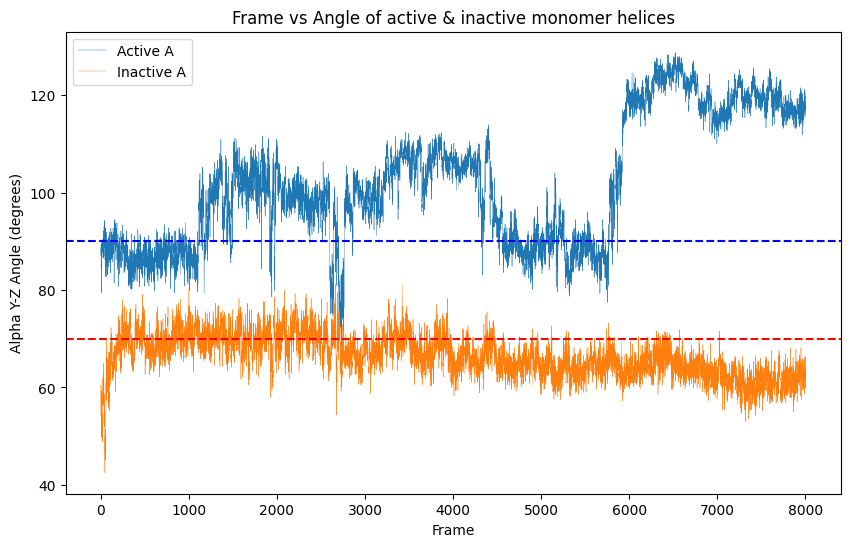

In [54]:
%matplotlib inline

angle_A_AM_columns = ['frame','angle']
angle_A_AM = pd.read_csv('../../3b3f/monomer/analysis_800/Y_Z_A_angle.dat', header=None, names=angle_A_AM_columns, delim_whitespace=True, skiprows=1)

angle_A_IM_columns = ['frame','angle']
angle_A_IM = pd.read_csv('../../3b3j/monomer/analysis_800/Y_Z_A_angle.dat', header=None, names=angle_A_IM_columns, delim_whitespace=True, skiprows=1)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(angle_A_AM['frame'], angle_A_AD['angle'], label='Active A', linewidth=0.3)
plt.plot(angle_A_IM['frame'], angle_A_ID['angle'], label='Inactive A', linewidth=0.3)
# Add title and labels
plt.title("Frame vs Angle of active & inactive monomer helices")
plt.xlabel("Frame")
plt.ylabel("Alpha Y-Z Angle (degrees)")

# Add a horizontal line at y=110
plt.axhline(y=90, color='b', linestyle='--')  # Dashed red line at y=110
# Add a horizontal line at y=110
plt.axhline(y=70, color='r', linestyle='--')  # Dashed red line at y=110

# Display the plot
plt.legend()
plt.show()

# FEL modified 

Total number of minima found: 45
Minima 1: PC1=33.1992, PC2=-36.3168, Energy=0.9742 kcal/mol, Frame=1006
Minima 2: PC1=54.1849, PC2=-36.3168, Energy=0.9742 kcal/mol, Frame=178
Minima 3: PC1=49.9878, PC2=-33.5119, Energy=0.9742 kcal/mol, Frame=381
Minima 4: PC1=29.0021, PC2=-30.7070, Energy=0.9040 kcal/mol, Frame=272
Minima 5: PC1=37.3963, PC2=-25.0971, Energy=0.8412 kcal/mol, Frame=707
Minima 6: PC1=24.8049, PC2=-22.2921, Energy=0.7844 kcal/mol, Frame=1327
Minima 7: PC1=41.5935, PC2=-22.2921, Energy=0.7844 kcal/mol, Frame=649
Minima 8: PC1=-21.3636, PC2=-16.6823, Energy=0.1294 kcal/mol, Frame=3171
Minima 9: PC1=12.2135, PC2=-16.6823, Energy=0.9040 kcal/mol, Frame=1269
Minima 10: PC1=33.1992, PC2=-13.8773, Energy=0.7325 kcal/mol, Frame=1014
Minima 11: PC1=16.4106, PC2=-11.0724, Energy=0.9742 kcal/mol, Frame=1219
Minima 12: PC1=-63.3350, PC2=-8.2674, Energy=0.9742 kcal/mol, Frame=7971
Minima 13: PC1=-12.9693, PC2=-8.2674, Energy=0.1478 kcal/mol, Frame=7104
Minima 14: PC1=37.3963, PC2=-8.

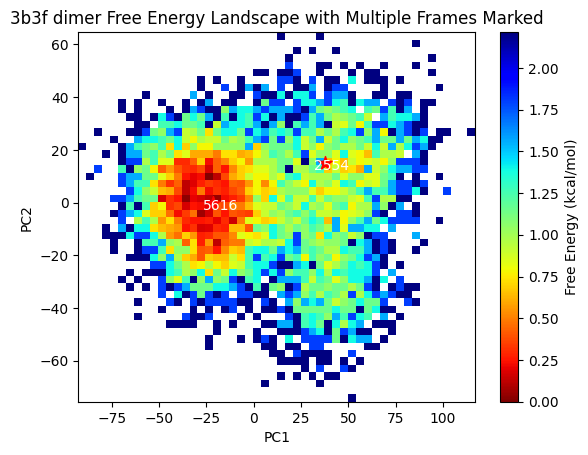

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Load PC1 and PC2 data
pc1 = np.loadtxt("../../3b3f/dimer/analysis_800/3b3f_di_PC1.dat", skiprows=1, usecols=1)
pc2 = np.loadtxt("../../3b3f/dimer/analysis_800/3b3f_di_PC2.dat", skiprows=1, usecols=1)

# Ensure that pc1 and pc2 are numpy arrays
pc1 = np.asarray(pc1).flatten()
pc2 = np.asarray(pc2).flatten()

# Generate frame numbers
frames = np.arange(len(pc1))

# Specify the frames you want to mark
frames_to_mark = [5616, 2554]  # Replace with the list of frames you're interested in

# Get the PC1 and PC2 values corresponding to these frames
pc1_to_mark = pc1[frames_to_mark]
pc2_to_mark = pc2[frames_to_mark]

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Create a 2D histogram
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# 2D Plot with multiple marked frames
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')

# Mark the specific frames with different markers or colors
ax.scatter(pc1_to_mark, pc2_to_mark, color='red', marker='*', s=100, label='Selected Frames')

# Annotate each frame number on the plot
for i, frame in enumerate(frames_to_mark):
    ax.annotate(f'{frame}', (pc1_to_mark[i], pc2_to_mark[i]), textcoords="offset points", xytext=(5,-5), ha='center', color='white')

#ax.legend()

plt.title(f'3b3f dimer Free Energy Landscape with Multiple Frames Marked')
plt.show()


In [20]:
import numpy as np
from scipy.signal import argrelextrema
from scipy.spatial.distance import euclidean

# Assuming you have already loaded and calculated the free_energy, and have pc1, pc2, frames data

# Extract multiple minima using argrelextrema from scipy.signal
local_minima_indices = argrelextrema(free_energy, np.less, order=5)  # order=5 controls the neighborhood size

# Extract the coordinates and values of the local minima
min_pc1 = xedges[local_minima_indices[1]]
min_pc2 = yedges[local_minima_indices[0]]
min_energy_values = free_energy[local_minima_indices]

# Combine the minima into one array for easy access
minima_data = np.column_stack((min_pc1, min_pc2, min_energy_values))

# Print all minima (no filtering by free energy)
print(f"Total number of minima found: {len(minima_data)}")

# Create a list to store selected frames
selected_frames = []

# Loop through all minima and find the corresponding frame numbers
for i, (pc1_value, pc2_value, energy_value) in enumerate(minima_data):
    # Find the frame closest to the selected PC1, PC2 values
    distances = np.sqrt((pc1 - pc1_value)**2 + (pc2 - pc2_value)**2)
    frame_index = np.argmin(distances)
    selected_frames.append(frames[frame_index])
    
    # Print each minimum's PC1, PC2, free energy, and corresponding frame number
    print(f"Minima {i+1}: PC1={pc1_value:.4f}, PC2={pc2_value:.4f}, Energy={energy_value:.4f} kcal/mol, Frame={frames[frame_index]}")

# Now you have all minima and their corresponding frame numbers printed

Total number of minima found: 45
Minima 1: PC1=33.1992, PC2=-36.3168, Energy=0.9742 kcal/mol, Frame=1006
Minima 2: PC1=54.1849, PC2=-36.3168, Energy=0.9742 kcal/mol, Frame=178
Minima 3: PC1=49.9878, PC2=-33.5119, Energy=0.9742 kcal/mol, Frame=381
Minima 4: PC1=29.0021, PC2=-30.7070, Energy=0.9040 kcal/mol, Frame=272
Minima 5: PC1=37.3963, PC2=-25.0971, Energy=0.8412 kcal/mol, Frame=707
Minima 6: PC1=24.8049, PC2=-22.2921, Energy=0.7844 kcal/mol, Frame=1327
Minima 7: PC1=41.5935, PC2=-22.2921, Energy=0.7844 kcal/mol, Frame=649
Minima 8: PC1=-21.3636, PC2=-16.6823, Energy=0.1294 kcal/mol, Frame=3171
Minima 9: PC1=12.2135, PC2=-16.6823, Energy=0.9040 kcal/mol, Frame=1269
Minima 10: PC1=33.1992, PC2=-13.8773, Energy=0.7325 kcal/mol, Frame=1014
Minima 11: PC1=16.4106, PC2=-11.0724, Energy=0.9742 kcal/mol, Frame=1219
Minima 12: PC1=-63.3350, PC2=-8.2674, Energy=0.9742 kcal/mol, Frame=7971
Minima 13: PC1=-12.9693, PC2=-8.2674, Energy=0.1478 kcal/mol, Frame=7104
Minima 14: PC1=37.3963, PC2=-8.

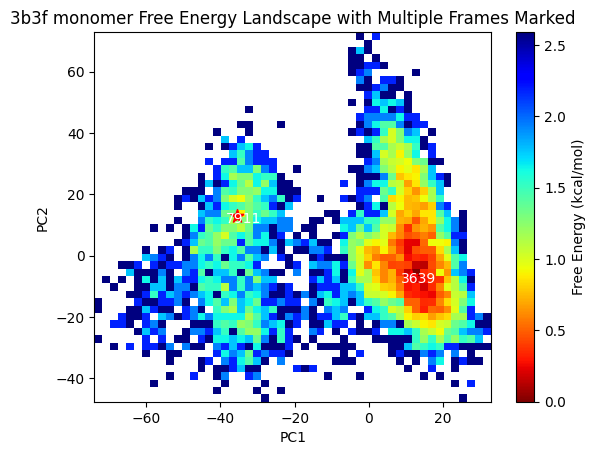

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Load PC1 and PC2 data
pc1 = np.loadtxt("../../3b3f/monomer/analysis_800/3b3f_mono_PC1.dat", skiprows=1, usecols=1)
pc2 = np.loadtxt("../../3b3f/monomer/analysis_800/3b3f_mono_PC2.dat", skiprows=1, usecols=1)

# Ensure that pc1 and pc2 are numpy arrays
pc1 = np.asarray(pc1).flatten()
pc2 = np.asarray(pc2).flatten()

# Generate frame numbers
frames = np.arange(len(pc1))

# Specify the frames you want to mark
frames_to_mark = [3639, 7911]  # Replace with the list of frames you're interested in

# Get the PC1 and PC2 values corresponding to these frames
pc1_to_mark = pc1[frames_to_mark]
pc2_to_mark = pc2[frames_to_mark]

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Create a 2D histogram
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# 2D Plot with multiple marked frames
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')

# Mark the specific frames with different markers or colors
ax.scatter(pc1_to_mark, pc2_to_mark, color='red', marker='*', s=100, label='Selected Frames')

# Annotate each frame number on the plot
for i, frame in enumerate(frames_to_mark):
    ax.annotate(f'{frame}', (pc1_to_mark[i], pc2_to_mark[i]), textcoords="offset points", xytext=(5,-5), ha='center', color='white')

#ax.legend()

plt.title(f'3b3f monomer Free Energy Landscape with Multiple Frames Marked')
plt.show()


In [26]:
import numpy as np
from scipy.signal import argrelextrema
from scipy.spatial.distance import euclidean

# Assuming you have already loaded and calculated the free_energy, and have pc1, pc2, frames data

# Extract multiple minima using argrelextrema from scipy.signal
local_minima_indices = argrelextrema(free_energy, np.less, order=5)  # order=5 controls the neighborhood size

# Extract the coordinates and values of the local minima
min_pc1 = xedges[local_minima_indices[1]]
min_pc2 = yedges[local_minima_indices[0]]
min_energy_values = free_energy[local_minima_indices]

# Combine the minima into one array for easy access
minima_data = np.column_stack((min_pc1, min_pc2, min_energy_values))

# Print all minima (no filtering by free energy)
print(f"Total number of minima found: {len(minima_data)}")

# Create a list to store selected frames
selected_frames = []

# Loop through all minima and find the corresponding frame numbers
for i, (pc1_value, pc2_value, energy_value) in enumerate(minima_data):
    # Find the frame closest to the selected PC1, PC2 values
    distances = np.sqrt((pc1 - pc1_value)**2 + (pc2 - pc2_value)**2)
    frame_index = np.argmin(distances)
    selected_frames.append(frames[frame_index])
    
    # Print each minimum's PC1, PC2, free energy, and corresponding frame number
    print(f"Minima {i+1}: PC1={pc1_value:.4f}, PC2={pc2_value:.4f}, Energy={energy_value:.4f} kcal/mol, Frame={frames[frame_index]}")

# Now you have all minima and their corresponding frame numbers printed

Total number of minima found: 32
Minima 1: PC1=-31.2048, PC2=-25.9151, Energy=1.2169 kcal/mol, Frame=7334
Minima 2: PC1=-35.4833, PC2=-23.5052, Energy=1.2169 kcal/mol, Frame=7664
Minima 3: PC1=-33.3441, PC2=-21.0953, Energy=1.1601 kcal/mol, Frame=7503
Minima 4: PC1=-37.6226, PC2=-18.6854, Energy=1.1601 kcal/mol, Frame=7320
Minima 5: PC1=-26.9263, PC2=-18.6854, Energy=1.5214 kcal/mol, Frame=7547
Minima 6: PC1=22.2767, PC2=-18.6854, Energy=0.9752 kcal/mol, Frame=4707
Minima 7: PC1=-41.9011, PC2=-16.2756, Energy=1.4295 kcal/mol, Frame=7313
Minima 8: PC1=15.8589, PC2=-13.8657, Energy=0.2456 kcal/mol, Frame=2941
Minima 9: PC1=20.1374, PC2=-13.8657, Energy=0.6031 kcal/mol, Frame=1274
Minima 10: PC1=24.4160, PC2=-13.8657, Energy=1.1082 kcal/mol, Frame=2483
Minima 11: PC1=-39.7618, PC2=-11.4558, Energy=1.1082 kcal/mol, Frame=7321
Minima 12: PC1=-31.2048, PC2=-9.0459, Energy=1.2797 kcal/mol, Frame=6841
Minima 13: PC1=17.9982, PC2=-9.0459, Energy=0.3757 kcal/mol, Frame=2632
Minima 14: PC1=9.4411

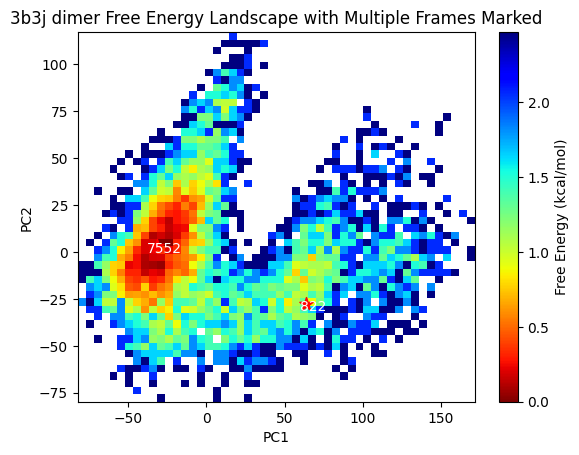

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Load PC1 and PC2 data
pc1 = np.loadtxt("../../3b3j/dimer/analysis_800/3b3j_di_PC1.dat", skiprows=1, usecols=1)
pc2 = np.loadtxt("../../3b3j/dimer/analysis_800/3b3j_di_PC2.dat", skiprows=1, usecols=1)

# Ensure that pc1 and pc2 are numpy arrays
pc1 = np.asarray(pc1).flatten()
pc2 = np.asarray(pc2).flatten()

# Generate frame numbers
frames = np.arange(len(pc1))

# Specify the frames you want to mark
frames_to_mark = [822, 7552]  # Replace with the list of frames you're interested in

# Get the PC1 and PC2 values corresponding to these frames
pc1_to_mark = pc1[frames_to_mark]
pc2_to_mark = pc2[frames_to_mark]

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Create a 2D histogram
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# 2D Plot with multiple marked frames
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')

# Mark the specific frames with different markers or colors
ax.scatter(pc1_to_mark, pc2_to_mark, color='red', marker='*', s=100, label='Selected Frames')

# Annotate each frame number on the plot
for i, frame in enumerate(frames_to_mark):
    ax.annotate(f'{frame}', (pc1_to_mark[i], pc2_to_mark[i]), textcoords="offset points", xytext=(5,-5), ha='center', color='white')

#ax.legend()

plt.title(f'3b3j dimer Free Energy Landscape with Multiple Frames Marked')
plt.show()

In [22]:
import numpy as np
from scipy.signal import argrelextrema
from scipy.spatial.distance import euclidean

# Assuming you have already loaded and calculated the free_energy, and have pc1, pc2, frames data

# Extract multiple minima using argrelextrema from scipy.signal
local_minima_indices = argrelextrema(free_energy, np.less, order=5)  # order=5 controls the neighborhood size

# Extract the coordinates and values of the local minima
min_pc1 = xedges[local_minima_indices[1]]
min_pc2 = yedges[local_minima_indices[0]]
min_energy_values = free_energy[local_minima_indices]

# Combine the minima into one array for easy access
minima_data = np.column_stack((min_pc1, min_pc2, min_energy_values))

# Print all minima (no filtering by free energy)
print(f"Total number of minima found: {len(minima_data)}")

# Create a list to store selected frames
selected_frames = []

# Loop through all minima and find the corresponding frame numbers
for i, (pc1_value, pc2_value, energy_value) in enumerate(minima_data):
    # Find the frame closest to the selected PC1, PC2 values
    distances = np.sqrt((pc1 - pc1_value)**2 + (pc2 - pc2_value)**2)
    frame_index = np.argmin(distances)
    selected_frames.append(frames[frame_index])
    
    # Print each minimum's PC1, PC2, free energy, and corresponding frame number
    print(f"Minima {i+1}: PC1={pc1_value:.4f}, PC2={pc2_value:.4f}, Energy={energy_value:.4f} kcal/mol, Frame={frames[frame_index]}")

# Now you have all minima and their corresponding frame numbers printed

Total number of minima found: 35
Minima 1: PC1=34.5169, PC2=-44.3117, Energy=1.3099 kcal/mol, Frame=1978
Minima 2: PC1=-21.2813, PC2=-40.3722, Energy=0.8967 kcal/mol, Frame=2755
Minima 3: PC1=14.2266, PC2=-36.4327, Energy=1.2303 kcal/mol, Frame=1960
Minima 4: PC1=9.1541, PC2=-32.4932, Energy=0.9886 kcal/mol, Frame=1762
Minima 5: PC1=19.2992, PC2=-28.5538, Energy=1.0404 kcal/mol, Frame=1710
Minima 6: PC1=24.3718, PC2=-28.5538, Energy=1.0973 kcal/mol, Frame=2009
Minima 7: PC1=39.5894, PC2=-28.5538, Energy=0.9886 kcal/mol, Frame=542
Minima 8: PC1=49.7346, PC2=-28.5538, Energy=0.8555 kcal/mol, Frame=851
Minima 9: PC1=64.9522, PC2=-28.5538, Energy=0.8967 kcal/mol, Frame=822
Minima 10: PC1=-0.9910, PC2=-24.6143, Energy=0.9886 kcal/mol, Frame=2017
Minima 11: PC1=44.6620, PC2=-24.6143, Energy=1.1601 kcal/mol, Frame=842
Minima 12: PC1=100.4602, PC2=-20.6748, Energy=1.3099 kcal/mol, Frame=657
Minima 13: PC1=59.8797, PC2=-16.7353, Energy=0.7468 kcal/mol, Frame=797
Minima 14: PC1=-56.7892, PC2=-12

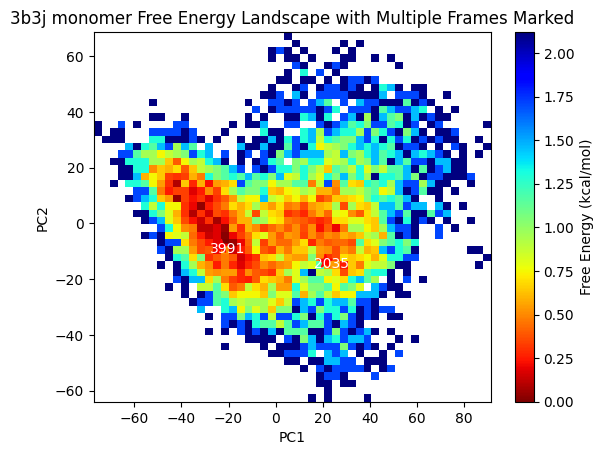

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D

# Load PC1 and PC2 data
pc1 = np.loadtxt("../../3b3j/monomer/analysis_800/3b3j_mono_PC1.dat", skiprows=1, usecols=1)
pc2 = np.loadtxt("../../3b3j/monomer/analysis_800/3b3j_mono_PC2.dat", skiprows=1, usecols=1)

# Ensure that pc1 and pc2 are numpy arrays
pc1 = np.asarray(pc1).flatten()
pc2 = np.asarray(pc2).flatten()

# Generate frame numbers
frames = np.arange(len(pc1))

# Specify the frames you want to mark
frames_to_mark = [3991, 2035]  # Replace with the list of frames you're interested in

# Get the PC1 and PC2 values corresponding to these frames
pc1_to_mark = pc1[frames_to_mark]
pc2_to_mark = pc2[frames_to_mark]

# Constants
k_B = 1.9872041e-3  # Boltzmann constant in kcal/(mol*K)
T = 300  # Temperature in Kelvin

# Create a 2D histogram
H, xedges, yedges = np.histogram2d(pc1, pc2, bins=50, density=True)

# Calculate the free energy
H = H.T
H = np.where(H > 0, H, np.nan)  # Replace zero values to avoid log(0)
free_energy = -k_B * T * np.log(H)

# Normalize the free energy
free_energy -= np.nanmin(free_energy)

# 2D Plot with multiple marked frames
fig, ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, free_energy, shading='auto', cmap='jet_r', norm=mcolors.Normalize(vmin=0, vmax=np.nanmax(free_energy)))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(c, ax=ax, label='Free Energy (kcal/mol)')

# Mark the specific frames with different markers or colors
ax.scatter(pc1_to_mark, pc2_to_mark, color='red', marker='*', s=100, label='Selected Frames')

# Annotate each frame number on the plot
for i, frame in enumerate(frames_to_mark):
    ax.annotate(f'{frame}', (pc1_to_mark[i], pc2_to_mark[i]), textcoords="offset points", xytext=(5,-5), ha='center', color='white')

#ax.legend()

plt.title(f'3b3j monomer Free Energy Landscape with Multiple Frames Marked')
plt.show()

In [33]:
import numpy as np
from scipy.signal import argrelextrema
from scipy.spatial.distance import euclidean

# Assuming you have already loaded and calculated the free_energy, and have pc1, pc2, frames data

# Extract multiple minima using argrelextrema from scipy.signal
local_minima_indices = argrelextrema(free_energy, np.less, order=5)  # order=5 controls the neighborhood size

# Extract the coordinates and values of the local minima
min_pc1 = xedges[local_minima_indices[1]]
min_pc2 = yedges[local_minima_indices[0]]
min_energy_values = free_energy[local_minima_indices]

# Combine the minima into one array for easy access
minima_data = np.column_stack((min_pc1, min_pc2, min_energy_values))

# Print all minima (no filtering by free energy)
print(f"Total number of minima found: {len(minima_data)}")

# Create a list to store selected frames
selected_frames = []

# Loop through all minima and find the corresponding frame numbers
for i, (pc1_value, pc2_value, energy_value) in enumerate(minima_data):
    # Find the frame closest to the selected PC1, PC2 values
    distances = np.sqrt((pc1 - pc1_value)**2 + (pc2 - pc2_value)**2)
    frame_index = np.argmin(distances)
    selected_frames.append(frames[frame_index])
    
    # Print each minimum's PC1, PC2, free energy, and corresponding frame number
    print(f"Minima {i+1}: PC1={pc1_value:.4f}, PC2={pc2_value:.4f}, Energy={energy_value:.4f} kcal/mol, Frame={frames[frame_index]}")

# Now you have all minima and their corresponding frame numbers printed

Total number of minima found: 40
Minima 1: PC1=-3.1127, PC2=-18.8771, Energy=0.3045 kcal/mol, Frame=3705
Minima 2: PC1=27.2239, PC2=-16.2235, Energy=0.2503 kcal/mol, Frame=2974
Minima 3: PC1=33.9654, PC2=-16.2235, Energy=0.4667 kcal/mol, Frame=2205
Minima 4: PC1=-16.5957, PC2=-13.5698, Energy=0.1547 kcal/mol, Frame=5049
Minima 5: PC1=-13.2249, PC2=-13.5698, Energy=0.2249 kcal/mol, Frame=5671
Minima 6: PC1=-9.8542, PC2=-13.5698, Energy=0.3045 kcal/mol, Frame=5161
Minima 7: PC1=20.4825, PC2=-13.5698, Energy=0.3045 kcal/mol, Frame=2035
Minima 8: PC1=40.7069, PC2=-13.5698, Energy=0.5904 kcal/mol, Frame=2775
Minima 9: PC1=-23.3372, PC2=-8.2626, Energy=0.0000 kcal/mol, Frame=3991
Minima 10: PC1=-19.9664, PC2=-8.2626, Energy=0.0534 kcal/mol, Frame=6497
Minima 11: PC1=-6.4835, PC2=-8.2626, Energy=0.3336 kcal/mol, Frame=6875
Minima 12: PC1=13.7410, PC2=-8.2626, Energy=0.2768 kcal/mol, Frame=2890
Minima 13: PC1=30.5947, PC2=-8.2626, Energy=0.3642 kcal/mol, Frame=2416
Minima 14: PC1=54.1899, PC2=